# Proyecto Inteligencia Artificial

Estudiantes:

*   Cabrera Tabash Samir
*   Mesen Alvarado Pablo
*   Urbina Salazar Luis

IMPLEMENTACION NO Feature Extraction



## Instalacion de dependencias y utilidades

In [1]:
# Instalar kagglehub si no está instalado
!pip install kagglehub -q

# Importar y descargar dataset
import kagglehub
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc, make_scorer)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



## Recopilacion y descarga de datos


### Metodos de Acceso


In [2]:
# Descargar dataset
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Ruta de descarga original:", path)

# Moverlo a /content
destino = "/content/chronic_kidney_disease_dataset"

shutil.copytree(path, destino, dirs_exist_ok=True)

print(f"Dataset disponible en: {destino}")


100%|██████████| 473k/473k [00:00<00:00, 14.6MB/s]

Extracting files...
Ruta de descarga original: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Dataset disponible en: /content/chronic_kidney_disease_dataset


## Fase preparacion de datos

### Descripcion de datos


In [3]:
# Reemplaza con la ruta a tu CSV
df = pd.read_csv("/content/chronic_kidney_disease_dataset/Chronic_Kidney_Dsease_data.csv")


In [4]:
print("Breve descripción del dataset y comprobación de funcionamiento de pandas.")

df.head()      # Muestra las primeras 5 filas
df.head(10)    # Muestra las primeras 10 filas
df.tail()      # Muestra las últimas 5 filas


Breve descripción del dataset y comprobación de funcionamiento de pandas.


PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
1654       1655   90       0          0                    1               2   
1655       1656   34       0          0                    2               1   
1656       1657   84       0          0                    2               3   
1657       1658   90       0          0                    2               2   
1658       1659   34       1          1                    0               0   

            BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
1654  39.677059        1            1.370151          4.157954  ...  2.138976   
1655  28.922015        0            3.372073          9.647525  ...  7.911566   
1656  21.951219        0           15.825955          7.349964  ...  0.015531   
1657  24.964149        0           12.967462          0.618614  ...  3.432765   
1658  19.253258        1           11.396510          7.446314  ...  9.293499   

      QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
1654           81.102765                    0                              0   
1655           10.600428                    0                              1   
1656           69.633427                    0                              0   
1657           31.858023                    0                              0   
1658           82.314878                    0                              0   

      WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
1654             0                  0.951836             9.547583   
1655             0                  3.604147             1.609847   
1656             0                  0.801955             5.768617   
1657             0                  0.560298             2.744519   
1658             0                  1.754852             0.186400   

      HealthLiteracy  Diagnosis  DoctorInCharge  
1654        2.046212          0    Confidential  
1655        0.324417          0    Confidential  
1656        4.935108          0    Confidential  
1657        0.322592          1    Confidential  
1658        4.553608          1    Confidential  

[5 rows x 54 columns]

In [5]:
print("Informacion basica de la data")
print("Registros:", df.shape[0], "Variables:", df.shape[1])
print(df.dtypes)

Informacion basica de la data
Registros: 1659 Variables: 54
PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float

In [6]:
print("Busqueda de valores faltantes en el dataset")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print(missing_report.sort_values("missing_pct", ascending=False))

Busqueda de valores faltantes en el dataset
                               missing_count  missing_pct
PatientID                                  0          0.0
Age                                        0          0.0
Gender                                     0          0.0
Ethnicity                                  0          0.0
SocioeconomicStatus                        0          0.0
EducationLevel                             0          0.0
BMI                                        0          0.0
Smoking                                    0          0.0
AlcoholConsumption                         0          0.0
PhysicalActivity                           0          0.0
DietQuality                                0          0.0
SleepQuality                               0          0.0
FamilyHistoryKidneyDisease                 0          0.0
FamilyHistoryHypertension                  0          0.0
FamilyHistoryDiabetes                      0          0.0
PreviousAcuteKidneyInjury   

In [7]:
print("Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID")
dups = df.duplicated().sum()
print("Duplicados exactos:", dups)
# revisar duplicados por PatientID
if "PatientID" in df.columns:
    print("Duplicados por PatientID:", df["PatientID"].duplicated().sum())

Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID
Duplicados exactos: 0
Duplicados por PatientID: 0


In [8]:
print("Resumen Estadistico Basico de los datos")
desc = df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
                                count        mean         std         min  \
PatientID                      1659.0  830.000000  479.056364    1.000000   
Age                            1659.0   54.441230   20.549757   20.000000   
Gender                         1659.0    0.515371    0.499914    0.000000   
Ethnicity                      1659.0    0.713080    1.000430    0.000000   
SocioeconomicStatus            1659.0    0.977697    0.776686    0.000000   
EducationLevel                 1659.0    1.693189    0.910611    0.000000   
BMI                            1659.0   27.620049    7.288670   15.033888   
Smoking                        1659.0    0.292948    0.455252    0.000000   
AlcoholConsumption             1659.0    9.969831    5.798787    0.021740   
PhysicalActivity               1659.0    5.024247    2.866274    0.001186   
DietQuality                    1659.0    5.028544    2.865777    0.002407   
SleepQuality                   1659.

In [9]:
print("Rangos esperados en los datos")
expected_ranges = {
    "Age": (0,120),
    "BMI": (10,60),
    "SystolicBP": (50,250),
    "DiastolicBP": (30,150),
    "SerumCreatinine": (0.1,10),
    "GFR": (0,200),
    "HbA1c": (3.0,15.0),
    "FastingBloodSugar": (30,400),
    "ProteinInUrine": (0,100),
    "ACR": (0,1000),
}
out_of_range = {}
for col,(low,high) in expected_ranges.items():
    if col in df.columns:
        vio = df[(df[col] < low) | (df[col] > high)]
        out_of_range[col] = len(vio)
print("Valores fuera de rango por variable:", out_of_range)

Rangos esperados en los datos
Valores fuera de rango por variable: {'Age': 0, 'BMI': 0, 'SystolicBP': 0, 'DiastolicBP': 0, 'SerumCreatinine': 0, 'GFR': 0, 'HbA1c': 0, 'FastingBloodSugar': 0, 'ProteinInUrine': 0, 'ACR': 0}


In [10]:
print("Deteccion de outliers en la data")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_outliers = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    iqr_outliers[col] = n_out
# Mostrar variables con mayor número de outliers
iqr_series = pd.Series(iqr_outliers).sort_values(ascending=False)
print("Outliers (IQR) por variable (top 20):")
print(iqr_series.head(20))

Deteccion de outliers en la data
Outliers (IQR) por variable (top 20):
UrinaryTractInfections           349
AntidiabeticMedications          336
Edema                            335
WaterQuality                     327
FamilyHistoryKidneyDisease       234
PreviousAcuteKidneyInjury        175
OccupationalExposureChemicals    171
Ethnicity                        162
Diagnosis                        135
HeavyMetalsExposure               73
Gender                             0
SocioeconomicStatus                0
BMI                                0
SleepQuality                       0
DietQuality                        0
Age                                0
EducationLevel                     0
AlcoholConsumption                 0
PhysicalActivity                   0
Smoking                            0
dtype: int64


In [11]:
print("correlacion entre variables clinicas")
clinicals = ["SerumCreatinine","GFR","BUNLevels","ProteinInUrine","ACR","HbA1c","HemoglobinLevels","SystolicBP"]
present = [c for c in clinicals if c in df.columns]
corr = df[present].corr()
print("Matriz de correlación (muestra):")
print(corr)

correlacion entre variables clinicas
Matriz de correlación (muestra):
                  SerumCreatinine       GFR  BUNLevels  ProteinInUrine  \
SerumCreatinine          1.000000 -0.003434   0.022555       -0.037101   
GFR                     -0.003434  1.000000  -0.036221       -0.009442   
BUNLevels                0.022555 -0.036221   1.000000       -0.000365   
ProteinInUrine          -0.037101 -0.009442  -0.000365        1.000000   
ACR                     -0.001899 -0.008342   0.011626       -0.014503   
HbA1c                   -0.035630 -0.038573   0.010360       -0.019301   
HemoglobinLevels        -0.003282 -0.019169   0.012472       -0.001390   
SystolicBP              -0.018829  0.009462   0.021084       -0.012435   

                       ACR     HbA1c  HemoglobinLevels  SystolicBP  
SerumCreatinine  -0.001899 -0.035630         -0.003282   -0.018829  
GFR              -0.008342 -0.038573         -0.019169    0.009462  
BUNLevels         0.011626  0.010360          0.012472  

### Limpieza datos

In [12]:
# ==== PREPROCESAMIENTO GENERAL PARA AMBOS MODELOS ====
df_clean = df.copy()

# 1. Eliminar variables no predictivas
df_clean = df_clean.drop(columns=["PatientID", "DoctorInCharge"])

# 2. Codificación one-hot SOLO en variables categóricas discretas
categorical_vars = ["Ethnicity", "SocioeconomicStatus", "EducationLevel"]
df_clean = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)

# 3. Transformación logarítmica SOLO en variables muy sesgadas
log_vars = ["SerumCreatinine", "BUNLevels", "ACR", "CholesterolTriglycerides"]
for var in log_vars:
    df_clean[f"log_{var}"] = np.log1p(df_clean[var])

# 4. Imputación muy suave por si hubiera NaNs
df_clean = df_clean.fillna(df_clean.median())

### Feature Selection


MÉTODO: Consenso (mínimo 2 votos)
                      Feature  Votos                                            Métodos  Seleccionada
          log_SerumCreatinine      3 selectkbest_f_classif, random_forest, rfe_logistic          True
                log_BUNLevels      3 selectkbest_f_classif, random_forest, rfe_logistic          True
              SerumCreatinine      2               selectkbest_f_classif, random_forest          True
                    BUNLevels      2               selectkbest_f_classif, random_forest          True
               ProteinInUrine      2               selectkbest_f_classif, random_forest          True
                          GFR      2               selectkbest_f_classif, random_forest          True
            FastingBloodSugar      2               selectkbest_f_classif, random_forest          True
                   SystolicBP      2               selectkbest_f_classif, random_forest          True
                 MuscleCramps      2           

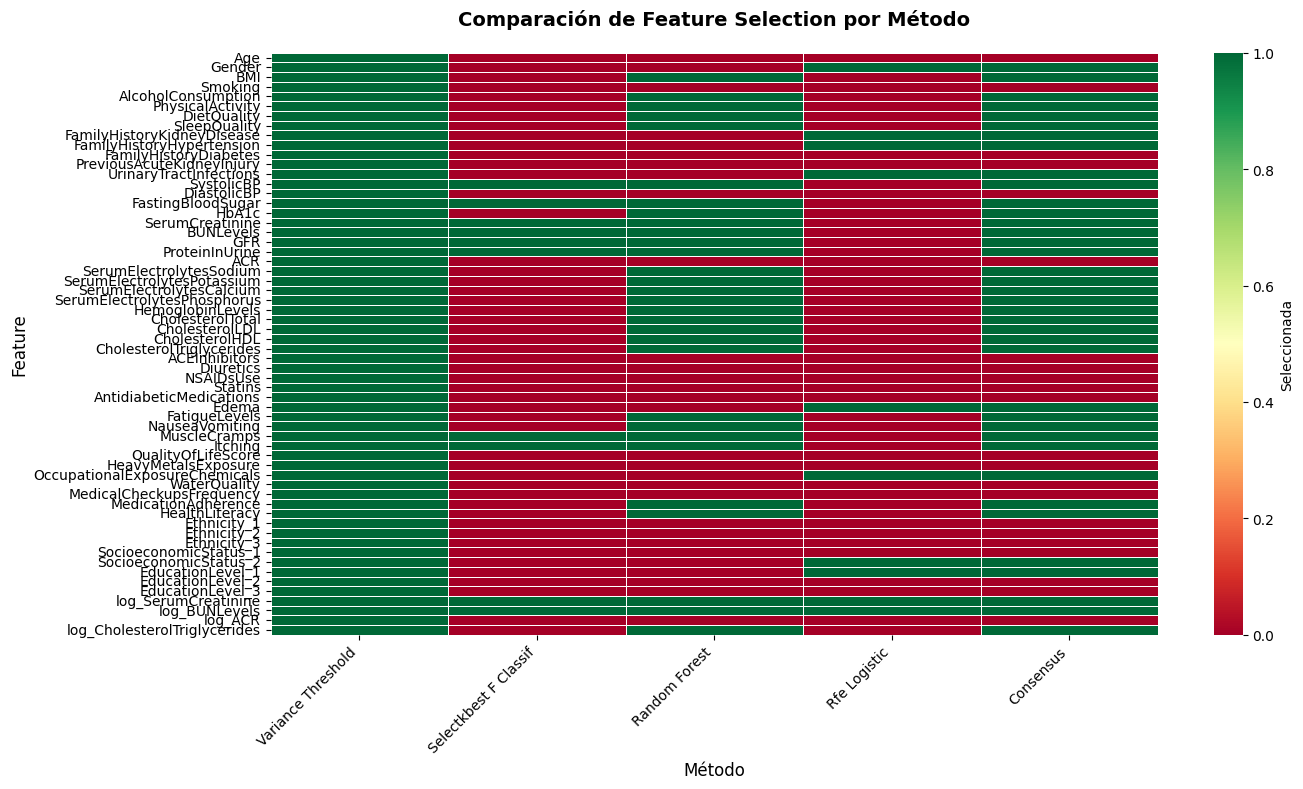

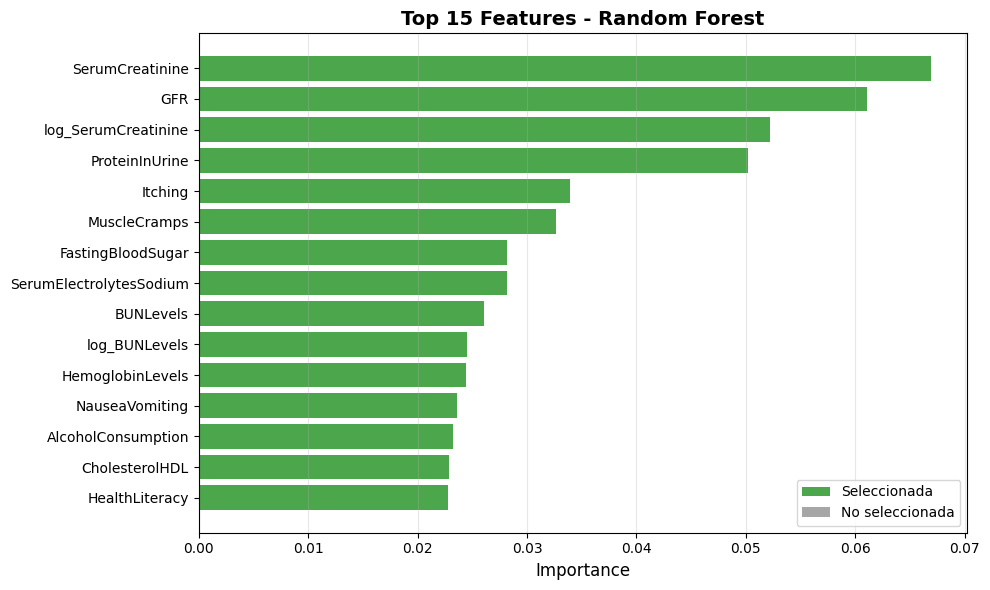


 RESUMEN FINAL
Features originales: 60
Features seleccionadas: 38
Reducción: 36.7%

Features finales: ['log_SerumCreatinine', 'log_BUNLevels', 'SerumCreatinine', 'BUNLevels', 'ProteinInUrine', 'GFR', 'FastingBloodSugar', 'SystolicBP', 'MuscleCramps', 'Itching', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'HemoglobinLevels', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SleepQuality', 'DietQuality', 'HbA1c', 'UrinaryTractInfections', 'CholesterolTotal', 'SerumElectrolytesPhosphorus', 'FatigueLevels', 'Edema', 'Gender', 'BMI', 'PhysicalActivity', 'AlcoholConsumption', 'OccupationalExposureChemicals', 'log_CholesterolTriglycerides', 'SocioeconomicStatus_2', 'EducationLevel_1', 'MedicationAdherence', 'HealthLiteracy', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'NauseaVomiting']


In [49]:
# ============================================================================
# MÓDULO DE FEATURE SELECTION
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import (SelectKBest, f_classif, chi2,
                                       mutual_info_classif, RFE,
                                       SelectFromModel, VarianceThreshold)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# ============================================================================
# CLASE PRINCIPAL: FeatureSelector
# ============================================================================
class FeatureSelector:
    """
    Clase para realizar Feature Selection con múltiples métodos
    y comparar resultados de forma automática
    """

    def __init__(self, X, y, feature_names=None):
        """
        Args:
            X: Features (DataFrame o array)
            y: Target variable
            feature_names: Nombres de las features (opcional)
        """
        if isinstance(X, pd.DataFrame):
            self.X = X.values
            self.feature_names = X.columns.tolist()
        else:
            self.X = X
            self.feature_names = feature_names if feature_names else [f"Feature_{i}" for i in range(X.shape[1])]

        self.y = y
        self.n_features = self.X.shape[1]
        self.resultados = {}

    def varianza_baja(self, threshold=0.01, verbose=True):
        """Elimina features con varianza muy baja"""
        selector = VarianceThreshold(threshold=threshold)
        selector.fit(self.X)

        mask = selector.get_support()
        selected_features = [self.feature_names[i] for i, m in enumerate(mask) if m]

        if verbose:
            eliminadas = [self.feature_names[i] for i, m in enumerate(mask) if not m]
            print(f"\n{'='*70}")
            print(f"MÉTODO: Variance Threshold (threshold={threshold})")
            print(f"{'='*70}")
            print(f"Features seleccionadas: {len(selected_features)}/{self.n_features}")
            if eliminadas:
                print(f"Features eliminadas (baja varianza): {eliminadas}")
            else:
                print("No se eliminó ninguna feature por baja varianza")

        self.resultados['variance_threshold'] = {
            'selected': selected_features,
            'mask': mask,
            'n_selected': len(selected_features)
        }

        return selected_features

    def correlacion_univariada(self, k=10, score_func='f_classif', verbose=True):
        """
        Selecciona las k mejores features según correlación con target

        Args:
            k: Número de features a seleccionar
            score_func: 'f_classif', 'chi2', o 'mutual_info'
        """
        if score_func == 'f_classif':
            scorer = f_classif
        elif score_func == 'chi2':
            scorer = chi2
        elif score_func == 'mutual_info':
            scorer = mutual_info_classif
        else:
            scorer = f_classif

        selector = SelectKBest(score_func=scorer, k=k)
        selector.fit(self.X, self.y)

        # Obtener scores y ranking
        scores = selector.scores_
        mask = selector.get_support()

        # Crear DataFrame con scores
        df_scores = pd.DataFrame({
            'Feature': self.feature_names,
            'Score': scores,
            'Selected': mask
        }).sort_values(by='Score', ascending=False)

        selected_features = df_scores[df_scores['Selected']]['Feature'].tolist()

        if verbose:
            print(f"\n{'='*70}")
            print(f"MÉTODO: SelectKBest ({score_func}, k={k})")
            print(f"{'='*70}")
            print(df_scores.to_string(index=False))

        self.resultados[f'selectkbest_{score_func}'] = {
            'selected': selected_features,
            'mask': mask,
            'scores': df_scores,
            'n_selected': k
        }

        return selected_features

    def importancia_random_forest(self, n_estimators=100, threshold='median', verbose=True):
        """Selecciona features según importancia de Random Forest"""

        rf = RandomForestClassifier(n_estimators=n_estimators,
                                    random_state=42,
                                    n_jobs=-1)
        rf.fit(self.X, self.y)

        # Obtener importancias
        importances = rf.feature_importances_

        # Selector basado en threshold
        selector = SelectFromModel(rf, threshold=threshold, prefit=True)
        mask = selector.get_support()

        # Crear DataFrame con importancias
        df_importances = pd.DataFrame({
            'Feature': self.feature_names,
            'Importance': importances,
            'Selected': mask
        }).sort_values(by='Importance', ascending=False)

        selected_features = df_importances[df_importances['Selected']]['Feature'].tolist()

        if verbose:
            print(f"\n{'='*70}")
            print(f"MÉTODO: Random Forest Importance (threshold={threshold})")
            print(f"{'='*70}")
            print(df_importances.to_string(index=False))
            print(f"\nFeatures seleccionadas: {len(selected_features)}/{self.n_features}")

        self.resultados['random_forest'] = {
            'selected': selected_features,
            'mask': mask,
            'importances': df_importances,
            'n_selected': len(selected_features)
        }

        return selected_features

    def rfe_selection(self, n_features_to_select=10, estimator='logistic', verbose=True):
        """
        Recursive Feature Elimination

        Args:
            n_features_to_select: Número de features a seleccionar
            estimator: 'logistic' o 'rf'
        """
        if estimator == 'logistic':
            model = LogisticRegression(max_iter=1000, random_state=42)
        else:
            model = RandomForestClassifier(n_estimators=50, random_state=42)

        selector = RFE(estimator=model,
                      n_features_to_select=n_features_to_select,
                      step=1)
        selector.fit(self.X, self.y)

        mask = selector.support_
        ranking = selector.ranking_

        # Crear DataFrame con rankings
        df_ranking = pd.DataFrame({
            'Feature': self.feature_names,
            'Ranking': ranking,
            'Selected': mask
        }).sort_values(by='Ranking')

        selected_features = df_ranking[df_ranking['Selected']]['Feature'].tolist()

        if verbose:
            print(f"\n{'='*70}")
            print(f"MÉTODO: RFE con {estimator} (n={n_features_to_select})")
            print(f"{'='*70}")
            print(df_ranking.to_string(index=False))

        self.resultados[f'rfe_{estimator}'] = {
            'selected': selected_features,
            'mask': mask,
            'ranking': df_ranking,
            'n_selected': n_features_to_select
        }

        return selected_features

    def correlacion_entre_features(self, threshold=0.9, verbose=True):
        """
        Identifica features altamente correlacionadas entre sí
        y sugiere cuáles eliminar
        """
        # Calcular matriz de correlación
        df_temp = pd.DataFrame(self.X, columns=self.feature_names)
        corr_matrix = df_temp.corr().abs()

        # Encontrar pares altamente correlacionados
        upper_triangle = np.triu(np.ones_like(corr_matrix), k=1).astype(bool)
        high_corr_pairs = []

        for i in range(len(corr_matrix)):
            for j in range(i+1, len(corr_matrix)):
                if corr_matrix.iloc[i, j] > threshold:
                    high_corr_pairs.append({
                        'Feature_1': self.feature_names[i],
                        'Feature_2': self.feature_names[j],
                        'Correlation': corr_matrix.iloc[i, j]
                    })

        if verbose:
            print(f"\n{'='*70}")
            print(f"ANÁLISIS: Correlación entre Features (threshold={threshold})")
            print(f"{'='*70}")
            if high_corr_pairs:
                df_corr = pd.DataFrame(high_corr_pairs).sort_values(by='Correlation', ascending=False)
                print(df_corr.to_string(index=False))
                print(f"\nConsidera eliminar una de cada par correlacionado")
            else:
                print(f" No hay pares de features con correlación > {threshold}")

        self.resultados['high_correlation'] = {
            'pairs': high_corr_pairs,
            'correlation_matrix': corr_matrix
        }

        return high_corr_pairs

    def consensus_selection(self, min_votes=3, verbose=True):
        """
        Selecciona features que aparecen en múltiples métodos (consenso)

        Args:
            min_votes: Mínimo de métodos que deben seleccionar la feature
        """
        if not self.resultados:
            print("Primero ejecuta los métodos de selección")
            return None

        # Contar votos por feature
        votos = {feature: 0 for feature in self.feature_names}
        metodos_por_feature = {feature: [] for feature in self.feature_names}

        for metodo, resultado in self.resultados.items():
            if 'selected' in resultado:
                for feature in resultado['selected']:
                    votos[feature] += 1
                    metodos_por_feature[feature].append(metodo)

        # Crear DataFrame de consenso
        df_consenso = pd.DataFrame({
            'Feature': list(votos.keys()),
            'Votos': list(votos.values()),
            'Métodos': [', '.join(metodos_por_feature[f]) for f in votos.keys()],
            'Seleccionada': [v >= min_votes for v in votos.values()]
        }).sort_values(by='Votos', ascending=False)

        selected_features = df_consenso[df_consenso['Seleccionada']]['Feature'].tolist()

        if verbose:
            print(f"\n{'='*70}")
            print(f"MÉTODO: Consenso (mínimo {min_votes} votos)")
            print(f"{'='*70}")
            print(df_consenso.to_string(index=False))
            print(f"\nFeatures seleccionadas por consenso: {len(selected_features)}/{self.n_features}")

        self.resultados['consensus'] = {
            'selected': selected_features,
            'df_consensus': df_consenso,
            'n_selected': len(selected_features)
        }

        return selected_features

    def plot_comparacion_metodos(self, figsize=(14, 8)):
        """Visualiza qué features selecciona cada método"""

        if not self.resultados:
            print("Primero ejecuta los métodos de selección")
            return

        # Crear matriz de selección
        metodos = [m for m in self.resultados.keys() if 'selected' in self.resultados[m]]
        matriz = np.zeros((len(self.feature_names), len(metodos)))

        for j, metodo in enumerate(metodos):
            selected = self.resultados[metodo]['selected']
            for i, feature in enumerate(self.feature_names):
                if feature in selected:
                    matriz[i, j] = 1

        # Graficar
        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(matriz,
                   xticklabels=[m.replace('_', ' ').title() for m in metodos],
                   yticklabels=self.feature_names,
                   cmap='RdYlGn',
                   cbar_kws={'label': 'Seleccionada'},
                   linewidths=0.5,
                   ax=ax)

        plt.title('Comparación de Feature Selection por Método',
                 fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Método', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_importancias_top(self, metodo='random_forest', top_n=15):
        """Grafica las top N features más importantes"""

        if metodo not in self.resultados:
            print(f"Método '{metodo}' no encontrado. Primero ejecútalo.")
            return

        if 'importances' in self.resultados[metodo]:
            df_plot = self.resultados[metodo]['importances'].head(top_n)

            fig, ax = plt.subplots(figsize=(10, 6))
            colors = ['green' if s else 'gray' for s in df_plot['Selected']]

            ax.barh(df_plot['Feature'], df_plot['Importance'], color=colors, alpha=0.7)
            ax.set_xlabel('Importance', fontsize=12)
            ax.set_title(f'Top {top_n} Features - Random Forest',
                        fontsize=14, fontweight='bold')
            ax.invert_yaxis()
            ax.grid(True, alpha=0.3, axis='x')

            # Leyenda
            from matplotlib.patches import Patch
            legend_elements = [
                Patch(facecolor='green', alpha=0.7, label='Seleccionada'),
                Patch(facecolor='gray', alpha=0.7, label='No seleccionada')
            ]
            ax.legend(handles=legend_elements, loc='lower right')

            plt.tight_layout()
            plt.show()


# ============================================================================
# FUNCIÓN WRAPPER PARA USO RÁPIDO
# ============================================================================
def seleccionar_features_automatico(X, y, n_features=10, metodo='consensus', verbose=True):
    """
    Función simplificada para selección automática de features

    Args:
        X: Features (DataFrame)
        y: Target
        n_features: Número de features deseado (para algunos métodos)
        metodo: 'rf', 'kbest', 'rfe', 'consensus'
        verbose: Mostrar resultados

    Returns:
        X_selected: DataFrame con features seleccionadas
        selected_features: Lista de nombres de features
    """

    selector = FeatureSelector(X, y)

    if metodo == 'rf':
        # Ajustar threshold para obtener aproximadamente n_features
        selector.importancia_random_forest(threshold='median', verbose=verbose)
        selected = selector.resultados['random_forest']['selected']

    elif metodo == 'kbest':
        selected = selector.correlacion_univariada(k=n_features, verbose=verbose)

    elif metodo == 'rfe':
        selected = selector.rfe_selection(n_features_to_select=n_features, verbose=verbose)

    elif metodo == 'consensus':
        # Ejecutar múltiples métodos y hacer consenso
        selector.correlacion_univariada(k=n_features, verbose=False)
        selector.importancia_random_forest(verbose=False)
        selector.rfe_selection(n_features_to_select=n_features, verbose=False)
        selected = selector.consensus_selection(min_votes=2, verbose=verbose)

    else:
        raise ValueError(f"Método '{metodo}' no reconocido")

    if isinstance(X, pd.DataFrame):
        X_selected = X[selected]
    else:
        feature_indices = [i for i, name in enumerate(selector.feature_names) if name in selected]
        X_selected = X[:, feature_indices]

    return X_selected, selected


# ============================================================================
# PIPELINE COMPLETO DE ANÁLISIS
# ============================================================================
def analisis_completo_feature_selection(df_clean, target_col, n_features_objetivo=10):
    """
    Ejecuta análisis completo de feature selection con todos los métodos
    y genera visualizaciones

    Args:
        df_clean: DataFrame preprocesado
        target_col: Nombre de la columna target
        n_features_objetivo: Número de features que quieres al final

    Returns:
        df_selected: DataFrame con features seleccionadas
        selector: Objeto FeatureSelector con todos los resultados
    """

    print("="*70)
    print(" ANÁLISIS COMPLETO DE FEATURE SELECTION")
    print("="*70)

    # Separar X e y
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    print(f"\nDataset inicial:")
    print(f"   • Número de features: {X.shape[1]}")
    print(f"   • Número de muestras: {X.shape[0]}")
    print(f"   • Objetivo: Reducir a {n_features_objetivo} features")

    # Crear selector
    selector = FeatureSelector(X, y)

    # 1. Varianza baja
    selector.varianza_baja(threshold=0.01)

    # 2. Correlación entre features
    selector.correlacion_entre_features(threshold=0.85)

    # 3. SelectKBest
    selector.correlacion_univariada(k=n_features_objetivo, score_func='f_classif')

    # 4. Random Forest Importance
    selector.importancia_random_forest(threshold='median')

    # 5. RFE
    selector.rfe_selection(n_features_to_select=n_features_objetivo, estimator='logistic')

    # 6. Consenso
    selected_features = selector.consensus_selection(min_votes=2)

    # Visualizaciones
    print("\n" + "="*70)
    print(" GENERANDO VISUALIZACIONES")
    print("="*70)

    selector.plot_comparacion_metodos()
    selector.plot_importancias_top(metodo='random_forest', top_n=15)

    # DataFrame final
    df_selected = X[selected_features].copy()
    df_selected[target_col] = y.values

    print("\n" + "="*70)
    print(" RESUMEN FINAL")
    print("="*70)
    print(f"Features originales: {X.shape[1]}")
    print(f"Features seleccionadas: {len(selected_features)}")
    print(f"Reducción: {(1 - len(selected_features)/X.shape[1])*100:.1f}%")
    print(f"\nFeatures finales: {selected_features}")

    return df_selected, selector


# ============================================================================
# EJEMPLO DE USO
# ============================================================================

# OPCIÓN 1: Uso rápido con un solo método
X_selected, selected_features = seleccionar_features_automatico(
    X=df_clean.drop(columns=['Diagnosis']),
    y=df_clean['Diagnosis'],
    n_features=10,
    metodo='consensus',  # 'rf', 'kbest', 'rfe', 'consensus'
    verbose=True
)

# OPCIÓN 2: Análisis completo con todas las comparaciones
df_selected, selector = analisis_completo_feature_selection(
    df_clean=df_clean,
    target_col='Diagnosis',
    n_features_objetivo=10
)

# Ahora puedes usar df_selected para el balanceo y entrenamiento
X_train_selected = df_selected.drop(columns=['Diagnosis'])
y_train_selected = df_selected['Diagnosis']


### Division de datos

#### Técnicas de Balanceo de Clases en Machine Learning

##### ¿Por qué balancear?

En datasets médicos es común tener **desbalance**: muchos pacientes sanos (clase 0) y pocos enfermos (clase 1). Esto causa que los modelos aprendan a predecir siempre "sano" ignorando a los enfermos, lo cual es **peligroso en medicina**.

---

#### Técnicas de Balanceo

##### 1. **SMOTE** (Synthetic Minority Over-sampling Technique)
```python
sampling_strategy=0.5  # Clase minoritaria = 50% de la mayoritaria
```

**¿Qué hace?**  
Crea **pacientes sintéticos** de la clase minoritaria (enfermos) interpolando entre casos reales cercanos.

**¿Cómo funciona?**  
- Toma un paciente enfermo real
- Encuentra sus vecinos más cercanos (también enfermos)
- Crea nuevos casos "entre" ellos combinando sus características

**En medicina:**  
✅ Aumenta casos de enfermedad sin duplicar exactamente  
✅ Útil cuando tienes pocos enfermos pero son representativos  
⚠️ Puede generar casos poco realistas si hay ruido en los datos

---

##### 2. **SMOTEENN** (SMOTE + Edited Nearest Neighbours)
```python
sampling_strategy=0.8  # Balance parcial
n_neighbors=5  # Vecinos para limpiar
```

**¿Qué hace?**  
Primero aplica SMOTE (crea enfermos sintéticos), luego **limpia casos ambiguos** de ambas clases eliminando muestras rodeadas de vecinos de la clase opuesta.

**¿Cómo funciona?**  
1. SMOTE genera enfermos sintéticos
2. ENN elimina casos "sospechosos": sanos rodeados de enfermos y viceversa

**En medicina:**  
✅ Combina lo mejor: más enfermos + datos más limpios  
✅ Elimina posibles errores de etiquetado o casos atípicos  
⚠️ Puede perder información si los casos ambiguos son reales

---

##### 3. **Random Under Sampling** (Down Sampling)
```python
sampling_strategy=0.5  # Elimina sanos hasta ratio 2:1
```

**¿Qué hace?**  
**Elimina al azar** pacientes de la clase mayoritaria (sanos) para equilibrar.

**¿Cómo funciona?**  
Si tienes 900 sanos y 100 enfermos, elimina 700 sanos para quedar con 200 sanos y 100 enfermos (ratio 2:1).

**En medicina:**  
✅ Simple y rápido  
✅ No genera datos artificiales  
⚠️ **Pierdes información real** de pacientes sanos  
⚠️ Solo recomendado si tienes MUCHOS sanos redundantes

---

##### 4. **ADASYN** (Adaptive Synthetic Sampling)
```python
sampling_strategy=0.5
```

**¿Qué hace?**  
Similar a SMOTE pero **adaptativo**: genera más casos sintéticos en las **zonas difíciles** de clasificar (frontera entre clases).

**¿Cómo funciona?**  
- Identifica qué enfermos están rodeados de sanos (casos difíciles)
- Genera más sintéticos en esas zonas complejas
- Menos sintéticos donde la clasificación es clara

**En medicina:**  
✅ Enfoca el aprendizaje en casos difíciles de diagnosticar  
✅ Mejor que SMOTE cuando la frontera enfermo/sano es compleja  
⚠️ Más sensible al ruido que SMOTE

---

##### 5. **Tomek Links** (Limpieza)
```python
tomek = TomekLinks()
```

**¿Qué hace?**  
**NO balancea**, solo **limpia**: elimina pares de casos (uno sano, uno enfermo) que son vecinos más cercanos entre sí.

**¿Cómo funciona?**  
Si un sano y un enfermo son mutuamente vecinos más cercanos, elimina el caso de la clase **mayoritaria** (sano).

**En medicina:**  
✅ Clarifica la frontera entre clases  
✅ Elimina casos posiblemente mal etiquetados  
⚠️ Cambio mínimo en el balance, se usa antes de otras técnicas

---

##### 6. **Class Weights** (Pesos en el Modelo)
```python
class_weight={0: 0.55, 1: 4.5}  # Ejemplo
```

**¿Qué hace?**  
NO modifica los datos, sino que le dice al modelo: **"penaliza más los errores en la clase minoritaria"**.

**¿Cómo funciona?**  
- Si el modelo clasifica mal a un enfermo, el error cuenta 4.5x más
- Si clasifica mal a un sano, cuenta 0.55x
- Así el modelo aprende a no ignorar a los enfermos

**En medicina:**  
✅ Mantiene TODOS los datos originales  
✅ Ideal cuando no quieres generar datos sintéticos  
✅ Compatible con la mayoría de algoritmos (Random Forest, SVM, etc.)  
⚠️ Requiere que el modelo soporte `class_weight`

---

#### Comparación Rápida

| Técnica | Tipo | Ventaja Principal | Desventaja |
|---------|------|-------------------|------------|
| **SMOTE** | Over-sampling | Genera datos sintéticos balanceados | Puede crear casos irreales |
| **SMOTEENN** | Híbrida | Balance + limpieza | Más compleja, puede perder datos |
| **Random Under** | Under-sampling | Simple, no crea sintéticos | Pierde información real |
| **ADASYN** | Over-sampling | Enfoque en zonas difíciles | Sensible al ruido |
| **Tomek Links** | Limpieza | Clarifica fronteras | No balancea |
| **Class Weights** | Modelo | No modifica datos | Depende del algoritmo |


In [20]:
df_selected["Diagnosis"].value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

In [21]:
# Celda 0: Preparar X (features) e y (target)
X = df_selected.drop('Diagnosis', axis=1)  # Todas las columnas excepto Diagnosis
y = df_selected['Diagnosis']  # Solo la columna objetivo

print(f"Dataset preparado:")
print(f"Features (X): {X.shape[0]} filas x {X.shape[1]} columnas")
print(f"Target (y): {y.shape[0]} valores")
print(f"\nDistribución de clases:")
print(y.value_counts().sort_index())

Dataset preparado:
Features (X): 1659 filas x 38 columnas
Target (y): 1659 valores

Distribución de clases:
Diagnosis
0     135
1    1524
Name: count, dtype: int64


In [22]:
# Celda 1: División train/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Mantiene proporción de clases
    random_state=42
)

print(f"Train: {len(X_train)} | Test: {len(X_test)}")
print(f"Train - Clase 0: {sum(y_train==0)} | Clase 1: {sum(y_train==1)}")
print(f"Test  - Clase 0: {sum(y_test==0)} | Clase 1: {sum(y_test==1)}")

Train: 1327 | Test: 332
Train - Clase 0: 108 | Clase 1: 1219
Test  - Clase 0: 27 | Clase 1: 305


In [26]:
# Verificar que NO hay duplicados entre train y test
train_indices = set(X_train.index)
test_indices = set(X_test.index)

overlap = train_indices.intersection(test_indices)

print(f"Índices en train: {len(train_indices)}")
print(f"Índices en test: {len(test_indices)}")
print(f"Índices repetidos: {len(overlap)}")  # Debe ser 0
print(f"Total único: {len(train_indices) + len(test_indices)}")  # Debe ser 1659

Índices en train: 1327
Índices en test: 332
Índices repetidos: 0
Total único: 1659


In [27]:
# Celda 2: Verificar desbalance original

# Importante notar que el balanceo solo se hace al train, el test NUNCA se toca

print(" Distribución ANTES del balanceo:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\n Ratio: {sum(y_train==0) / sum(y_train==1):.2%}")

 Distribución ANTES del balanceo:
Diagnosis
0     108
1    1219
Name: count, dtype: int64

 Ratio: 8.86%


In [28]:
# Celda 3: SMOTE con ratio 1:2 (recomendado)

sm = SMOTE(sampling_strategy=0.5, random_state=42)  # Clase 0 = 50% de Clase 1
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("SMOTE aplicado (ratio 1:2)")
print(pd.Series(y_train_smote).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_smote==0) / sum(y_train_smote==1):.2%}")

SMOTE aplicado (ratio 1:2)
Diagnosis
0     609
1    1219
Name: count, dtype: int64
Nuevo ratio: 49.96%


In [29]:
# Prueba SMOTEENN con parámetros más conservadores

smenn = SMOTEENN(
    sampling_strategy=0.8,  # No balance perfecto
    enn=EditedNearestNeighbours(n_neighbors=5),  # Más conservador
    random_state=42
)

X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

print("SMOTEENN aplicado (balance + limpieza)")
print(pd.Series(y_train_smenn).value_counts().sort_index())
print(f"Muestras eliminadas: {len(X_train) - len(X_train_smenn)}")

SMOTEENN aplicado (balance + limpieza)
Diagnosis
0    975
1    621
Name: count, dtype: int64
Muestras eliminadas: -269


In [30]:

# Down sampling relación 2:1 (mayoritaria : minoritaria)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
# 0.5 significa: clase minoritaria será 50% de la mayoritaria → 2:1

X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

print("Down Sampling aplicado (2:1)")
print(pd.Series(y_train_down).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_down==0) / sum(y_train_down==1):.2%}")


Down Sampling aplicado (2:1)
Diagnosis
0    108
1    216
Name: count, dtype: int64
Nuevo ratio: 50.00%


In [31]:
# ADASYN: generar más datos sintéticos donde la frontera es compleja

adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

print("ADASYN aplicado (ratio 1:2)")
print(pd.Series(y_train_ada).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_ada==0) / sum(y_train_ada==1):.2%}")

ADASYN aplicado (ratio 1:2)
Diagnosis
0     593
1    1219
Name: count, dtype: int64
Nuevo ratio: 48.65%


In [32]:

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

print("Tomek Links aplicado (limpieza)")
print(pd.Series(y_train_tomek).value_counts().sort_index())
print(f"Nuevo ratio: {sum(y_train_tomek==0) / sum(y_train_tomek==1):.2%}")

Tomek Links aplicado (limpieza)
Diagnosis
0     108
1    1174
Name: count, dtype: int64
Nuevo ratio: 9.20%


In [33]:
# Celda 5: Class weights (para usar con modelo)
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print("Pesos calculados para el modelo:")
print(f"Clase 0: {weights[0]:.2f} | Clase 1: {weights[1]:.2f}")

Pesos calculados para el modelo:
Clase 0: 6.14 | Clase 1: 0.54


In [34]:
# Comparación completa


print("RESUMEN DE CONJUNTOS:\n")

print("Original (train):")
print(pd.Series(y_train).value_counts())

print("\nSMOTE (ratio 1:2):")
print(pd.Series(y_train_smote).value_counts())

print("\nSMOTEENN (balance + limpieza):")
print(pd.Series(y_train_smenn).value_counts())

print("\nDown Sampling (2:1):")
print(pd.Series(y_train_down).value_counts())

print("\nADASYN (ratio 1:2):")
print(pd.Series(y_train_ada).value_counts())

print("\nTomek Links (limpieza):")
print(pd.Series(y_train_tomek).value_counts())

print("\nPesos por clase:")
print(f"Clase 0: {class_weight[0]:.2f}x más importante")
print(f"Clase 1: {class_weight[1]:.2f}x más importante")

RESUMEN DE CONJUNTOS:

Original (train):
Diagnosis
1    1219
0     108
Name: count, dtype: int64

SMOTE (ratio 1:2):
Diagnosis
1    1219
0     609
Name: count, dtype: int64

SMOTEENN (balance + limpieza):
Diagnosis
0    975
1    621
Name: count, dtype: int64

Down Sampling (2:1):
Diagnosis
1    216
0    108
Name: count, dtype: int64

ADASYN (ratio 1:2):
Diagnosis
1    1219
0     593
Name: count, dtype: int64

Tomek Links (limpieza):
Diagnosis
1    1174
0     108
Name: count, dtype: int64

Pesos por clase:
Clase 0: 6.14x más importante
Clase 1: 0.54x más importante


## Modelado de algoritmos

### Métricas de Evaluación en Clasificación Binaria (Medicina)

#### Contexto Médico
En diagnóstico médico, típicamente:
- **Clase 0**: Paciente **sano** (negativo)
- **Clase 1**: Paciente **enfermo** (positivo)

---

### Métricas Básicas

#### **Accuracy (Exactitud)**
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```
**¿Qué mide?** Proporción total de predicciones correctas sobre todas las predicciones.

**En medicina:** Útil cuando las clases están balanceadas, pero **puede ser engañosa** si hay muchos más sanos que enfermos (ej: 95% sanos → accuracy alto aunque no detecte enfermos).

---

#### **Precision (Precisión)**
```
Precision = TP / (TP + FP)
```
**¿Qué mide?** De todos los pacientes que **predijimos como enfermos**, ¿cuántos realmente lo están?

**En medicina:** Importante cuando los **falsos positivos son costosos** (ej: cirugías innecesarias, tratamientos agresivos). Alta precisión = pocos diagnósticos erróneos de enfermedad.

---

#### **Recall (Sensibilidad / Sensitivity)**
```
Recall = TP / (TP + FN)
```
**¿Qué mide?** De todos los pacientes **realmente enfermos**, ¿cuántos logramos identificar?

**En medicina:** **CRÍTICA** en enfermedades graves. Alta sensibilidad = detectamos casi todos los casos reales. Prioridad cuando los **falsos negativos son peligrosos** (ej: cáncer no detectado).

---

#### **F1-Score**
```
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```
**¿Qué mide?** Equilibrio armónico entre precisión y recall.

**En medicina:** Útil cuando queremos **balancear** ambos aspectos: no queremos ni muchos falsos positivos ni muchos falsos negativos.

---

#### **Specificity (Especificidad)**
```
Specificity = TN / (TN + FP)
```
**¿Qué mide?** De todos los pacientes **realmente sanos**, ¿cuántos identificamos correctamente?

**En medicina:** Importante en **pruebas de confirmación** o cuando queremos evitar alarmas falsas. Alta especificidad = pocos sanos diagnosticados erróneamente como enfermos.

---

### Promedios Multi-Métrica

#### **Macro Average**
```
Macro = (Métrica_clase0 + Métrica_clase1) / 2
```
**¿Qué mide?** Promedio simple sin considerar cuántos casos hay de cada clase.

**En medicina:** Da **igual importancia** a sanos y enfermos, útil cuando ambas clases son igualmente importantes clínicamente.

---

#### **Weighted Average**
```
Weighted = (n₀ × M₀ + n₁ × M₁) / (n₀ + n₁)
```
**¿Qué mide?** Promedio ponderado por cantidad de muestras de cada clase.

**En medicina:** Refleja mejor el **desempeño real** cuando hay desbalance (ej: si hay 90% sanos y 10% enfermos, da más peso a la clase mayoritaria).

---

## Cross-Validation (Validación Cruzada)

#### **Media de K-Folds**
```
Media = Σ(Métrica_i) / k    (i = 1 hasta k)
```

#### **Desviación Estándar**
```
Desviación = std(Métricas por fold)
```

**¿Qué mide?**
- **Media**: Rendimiento promedio del modelo en diferentes particiones de datos
- **Desviación**: Estabilidad del modelo (baja desviación = predicciones consistentes)

**En medicina:** Esencial para verificar que el modelo **generaliza bien** y no solo memoriza. Una desviación alta indica que el modelo es inestable y puede fallar con nuevos pacientes.

---

## Resumen Práctico para Medicina

| Métrica | Priorizar cuando... |
|---------|---------------------|
| **Recall** | Enfermedades graves (cáncer, sepsis) - No podemos perder casos |
| **Precision** | Tratamientos invasivos - Evitar intervenciones innecesarias |
| **Specificity** | Pruebas de screening - Evitar alarmar a sanos |
| **F1-Score** | Balance general requerido |
| **Accuracy** | Clases balanceadas y ambos errores tienen similar costo |

### Master solo emergencias

In [ ]:
warnings.filterwarnings('ignore')

# ===============================
# CONFIGURACIÓN DEL MODELO
# ===============================
# Descomenta el modelo que quieras usar:

# MODELO_TIPO = "LogisticRegression"
# MODELO_TIPO = "DecisionTree"
# MODELO_TIPO = "RandomForest"
# MODELO_TIPO = "KNN"
# MODELO_TIPO = "SVM"
# MODELO_TIPO = "GradientBoosting"
# MODELO_TIPO = "XGBoost"

# Configuración de Cross-Validation
N_FOLDS = 5
RANDOM_STATE = 42

print("="*70)
print(f" ANÁLISIS COMPARATIVO CON CROSS-VALIDATION - {MODELO_TIPO.upper()}")
print("="*70)
print(f" Cross-Validation: {N_FOLDS}-Fold Stratified")
print("="*70)

# ===============================
# FUNCIÓN PARA CREAR MODELOS
# ===============================
def crear_modelo(tipo, usar_class_weight=False):
    """Crea el modelo según el tipo especificado"""

    if tipo == "LogisticRegression":
        cw = 'balanced' if usar_class_weight else None
        return LogisticRegression(
            max_iter=1000,      # Iteraciones suficientes para convergencia
            class_weight=cw,    # 'balanced': penaliza más errores en clase minoritaria
            random_state=RANDOM_STATE
        )

    elif tipo == "DecisionTree":
        cw = 'balanced' if usar_class_weight else None
        return DecisionTreeClassifier(
            class_weight=cw,         # 'balanced': ajusta pesos por frecuencia de clases
            random_state=RANDOM_STATE,
            max_depth=10,            # Limita profundidad para evitar overfitting
            min_samples_split=20,    # Mínimo 20 muestras para dividir un nodo (reduce overfitting)
            min_samples_leaf=5       # Mínimo 5 muestras en hojas (evita nodos muy específicos)
        )

    elif tipo == "RandomForest":
        cw = 'balanced' if usar_class_weight else None
        return RandomForestClassifier(
            n_estimators=100,        # 100 árboles: balance entre rendimiento y tiempo
            class_weight=cw,         # 'balanced': cada árbol considera el desbalance
            random_state=RANDOM_STATE,
            max_depth=10,            # Limita complejidad de cada árbol
            min_samples_split=20,    # Reduce overfitting en árboles individuales
            n_jobs=-1                # Usa todos los núcleos CPU (paralelización)
        )

    elif tipo == "KNN":
        # KNN no soporta class_weight directamente
        return KNeighborsClassifier(
            n_neighbors=5,           # Considera 5 vecinos más cercanos (valor estándar)
            weights='distance',      # Pondera por distancia: vecinos cercanos pesan más
                                     # (ayuda indirectamente con desbalance)
            metric='minkowski',      # Distancia Euclidiana (p=2 por defecto)
            n_jobs=-1                # Paralelización del cálculo de distancias
        )

    elif tipo == "SVM":
        cw = 'balanced' if usar_class_weight else None
        return SVC(
            class_weight=cw,         # 'balanced': penaliza más errores en clase minoritaria
            random_state=RANDOM_STATE,
            kernel='rbf',            # Kernel Gaussiano: captura relaciones no lineales
            probability=True,        # NECESARIO para predict_proba() y calcular ROC-AUC
            C=1.0,                   # Parámetro de regularización (1.0 = moderado)
            gamma='scale'            # Auto-ajusta gamma según varianza de features
        )

    elif tipo == "GradientBoosting":
        return GradientBoostingClassifier(
            n_estimators=100,        # 100 árboles secuenciales
            learning_rate=0.1,       # Tasa de aprendizaje moderada (reduce overfitting)
            max_depth=5,             # Árboles poco profundos (weak learners típicos de boosting)
            random_state=RANDOM_STATE,
            subsample=0.8            # Usa 80% de datos por árbol (stochastic boosting)
                                     # Reduce overfitting y acelera entrenamiento
        )
        # Nota: No usa class_weight directamente, pero es robusto a desbalance
        # porque minimiza pérdida en cada iteración

    elif tipo == "XGBoost":
        # XGBoost usa scale_pos_weight en lugar de class_weight
        if usar_class_weight:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=RANDOM_STATE,
                scale_pos_weight=3,  # Peso relativo clase positiva/negativa
                                     # 3 = clase positiva pesa 3x más
                                     # Ajustar según ratio: n_neg/n_pos
                eval_metric='logloss',      # Función de pérdida logarítmica
                use_label_encoder=False     # Evita warning deprecated
            )
        else:
            return XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,             # Similar a GradientBoosting: árboles simples
                random_state=RANDOM_STATE,
                eval_metric='logloss',
                use_label_encoder=False
            )

# ===============================
# CONFIGURACIÓN DE DATASETS
# ===============================
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# Métricas para cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

resultados_train = []
resultados_test = []
resultados_cv = []
matrices_confusion = {}
curvas_pr = {}
modelos_entrenados = {}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

for nombre, (X_tr, y_tr) in datasets.items():
    print(f"\n{'='*70}")
    print(f" ENTRENANDO: {nombre}")
    print(f"{'='*70}")

    # Crear modelo
    usar_cw = (nombre == "Class Weights")
    modelo = crear_modelo(MODELO_TIPO, usar_class_weight=usar_cw)

    # ===== CROSS-VALIDATION =====
    print("\n--- CROSS-VALIDATION (Train) ---")
    cv_results = {}

    for metric_name, metric_func in scoring.items():
        scores = cross_val_score(modelo, X_tr, y_tr, cv=skf, scoring=metric_func, n_jobs=-1)
        cv_results[metric_name] = scores
        print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    resultados_cv.append({
        "Método": nombre,
        "CV Accuracy": cv_results['accuracy'].mean(),
        "CV Accuracy Std": cv_results['accuracy'].std(),
        "CV Precision": cv_results['precision'].mean(),
        "CV Recall": cv_results['recall'].mean(),
        "CV F1": cv_results['f1'].mean(),
        "CV ROC-AUC": cv_results['roc_auc'].mean(),
        "CV ROC-AUC Std": cv_results['roc_auc'].std()
    })

    # Entrenar modelo final
    modelo.fit(X_tr, y_tr)
    modelos_entrenados[nombre] = modelo

    # ===== MÉTRICAS TRAIN =====
    y_pred_train = modelo.predict(X_tr)
    y_prob_train = modelo.predict_proba(X_tr)[:, 1]

    print("\n--- MÉTRICAS TRAIN (Full) ---")
    print(classification_report(y_tr, y_pred_train))

    resultados_train.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_tr, y_pred_train),
        "Precision": precision_score(y_tr, y_pred_train),
        "Recall": recall_score(y_tr, y_pred_train),
        "F1-score": f1_score(y_tr, y_pred_train),
        "ROC-AUC": roc_auc_score(y_tr, y_prob_train),
        "Tamaño": len(y_tr)
    })

    # ===== MÉTRICAS TEST =====
    y_pred_test = modelo.predict(X_test)
    y_prob_test = modelo.predict_proba(X_test)[:, 1]

    print("\n--- MÉTRICAS TEST ---")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    resultados_test.append({
        "Método": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test),
        "Especificidad": especificidad
    })

    # Guardar matriz de confusión
    matrices_confusion[nombre] = cm

    # Guardar curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob_test)
    curvas_pr[nombre] = (precision_vals, recall_vals, auc(recall_vals, precision_vals))

# ===============================
# DATAFRAMES DE RESULTADOS
# ===============================
df_train = pd.DataFrame(resultados_train)
df_test = pd.DataFrame(resultados_test)
df_cv = pd.DataFrame(resultados_cv)

print("\n" + "="*70)
print(" RESULTADOS CROSS-VALIDATION")
print("="*70)
print(df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" TABLA COMPARATIVA - TRAIN (Full)")
print("="*70)
print(df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

print("\n" + "="*70)
print(" TABLA COMPARATIVA - TEST")
print("="*70)
print(df_test.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

# ===============================
# ANÁLISIS DE OVERFITTING
# ===============================
print("\n" + "="*70)
print(" ANÁLISIS DE OVERFITTING")
print("="*70)

overfitting_analysis = []
for i, row_train in df_train.iterrows():
    metodo = row_train['Método']
    row_test = df_test[df_test['Método'] == metodo].iloc[0]
    row_cv = df_cv[df_cv['Método'] == metodo].iloc[0]

    overfitting_analysis.append({
        'Método': metodo,
        'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
        'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
        'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
        'CV Std AUC': row_cv['CV ROC-AUC Std']
    })

df_overfit = pd.DataFrame(overfitting_analysis)
print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

# ===============================
# VISUALIZACIONES
# ===============================

# 1. PANEL PRINCIPAL
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Subplot 1: Curvas ROC
ax1 = fig.add_subplot(gs[0, :2])
for nombre, modelo in modelos_entrenados.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    ax1.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=11)
ax1.set_ylabel('True Positive Rate', fontsize=11)
ax1.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Curvas Precision-Recall
ax2 = fig.add_subplot(gs[0, 2])
for nombre, (precision_vals, recall_vals, pr_auc) in curvas_pr.items():
    ax2.plot(recall_vals, precision_vals, label=f'{nombre[:8]}', linewidth=2)

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=8)
ax2.grid(True, alpha=0.3)

# Subplot 3: Comparación CV vs Test
ax3 = fig.add_subplot(gs[1, 0])
metodos = df_cv['Método']
x_pos = np.arange(len(metodos))

ax3.barh(x_pos, df_cv['CV ROC-AUC'], alpha=0.6, label='CV', color='skyblue')
ax3.barh(x_pos, df_test['ROC-AUC'], alpha=0.6, label='Test', color='coral')
ax3.set_yticks(x_pos)
ax3.set_yticklabels(metodos, fontsize=8)
ax3.set_xlabel('ROC-AUC', fontsize=10)
ax3.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Subplot 4: Variabilidad CV
ax4 = fig.add_subplot(gs[1, 1])
ax4.errorbar(df_cv['CV ROC-AUC'], x_pos, xerr=df_cv['CV ROC-AUC Std'],
             fmt='o', capsize=5, capthick=2, markersize=8)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(metodos, fontsize=8)
ax4.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
ax4.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Subplot 5: Overfitting
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(x_pos, df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(metodos, fontsize=8)
ax5.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
ax5.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax5.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
ax5.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='x')

# Subplot 6-8: Mejores 3 matrices de confusión
top3_metodos = df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
for idx, metodo in enumerate(top3_metodos):
    ax = fig.add_subplot(gs[2, idx])
    cm = matrices_confusion[metodo]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, square=True, annot_kws={'size': 12})
    ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=9)
    ax.set_ylabel('Real', fontsize=9)

plt.suptitle(f'Análisis Completo - {MODELO_TIPO}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 2. GRÁFICO RADAR COMPARATIVO
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for metodo in df_test['Método']:
    valores = df_test[df_test['Método'] == metodo][categorias].values[0].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
    ax.fill(angles, valores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_title(f'Comparación Multimétrica - {MODELO_TIPO}', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ESTADÍSTICAS DESCRIPTIVAS
# ===============================
print("\n" + "="*70)
print(" ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\n--- TEST ---")
print(df_test[['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']].describe().T)
print("\n--- CROSS-VALIDATION ---")
print(df_cv[['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1', 'CV ROC-AUC']].describe().T)

# ===============================
# RECOMENDACIONES
# ===============================
print("\n" + "="*70)
print(" RECOMENDACIONES FINALES")
print("="*70)

mejor_cv = df_cv.loc[df_cv['CV ROC-AUC'].idxmax()]
mejor_test = df_test.loc[df_test['ROC-AUC'].idxmax()]
mejor_recall = df_test.loc[df_test['Recall'].idxmax()]
mejor_precision = df_test.loc[df_test['Precision'].idxmax()]
mejor_f1 = df_test.loc[df_test['F1-score'].idxmax()]
menos_overfit = df_overfit.loc[df_overfit['Train-Test (AUC)'].idxmin()]
mas_estable = df_cv.loc[df_cv['CV ROC-AUC Std'].idxmin()]

print(f"\n MEJOR RENDIMIENTO:")
print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

print(f"\n GENERALIZACIÓN:")
print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

print("\n" + "="*70)

### Modularizado

#### Configuracion

In [35]:
# ============================================================================
# CELDA 1: IMPORTS Y CONFIGURACIÓN GLOBAL
# ============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve,
                             confusion_matrix, precision_recall_curve, auc)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuración Global
RANDOM_STATE = 42
N_FOLDS = 5


#### Modelos

## Algoritmos de Clasificación en Machine Learning Médico

## Algoritmos Implementados

---

### 1. **Logistic Regression** (Regresión Logística)

**¿Qué es?**  
Modelo **lineal** que calcula la probabilidad de pertenecer a una clase usando una función sigmoide.

**¿Cómo funciona?**  
Encuentra una línea (o hiperplano) que separa enfermos de sanos. Para cada paciente calcula: P(enfermo) = 1 / (1 + e^(-z)), donde z es combinación lineal de características.

**En medicina:**  
✅ **Interpretable**: puedes ver qué características influyen más  
✅ Rápido y eficiente  
✅ Funciona bien cuando relación es aproximadamente lineal  
⚠️ Limitado con relaciones complejas no lineales

**Parámetros clave:**
- `max_iter=1000`: Iteraciones para convergencia
- `class_weight='balanced'`: Penaliza más errores en clase minoritaria

---

### 2. **Decision Tree** (Árbol de Decisión)

**¿Qué es?**  
Modelo que toma **decisiones secuenciales** como un diagrama de flujo médico.

**¿Cómo funciona?**  
```
¿Glucosa > 140?
  ├─ SÍ → ¿IMC > 30?
  │        ├─ SÍ → ENFERMO
  │        └─ NO → ¿Edad > 50? ...
  └─ NO → SANO
```

**En medicina:**  
✅ **Muy interpretable**: imita razonamiento clínico  
✅ Maneja relaciones no lineales  
✅ No requiere normalización de datos  
⚠️ Propenso a **overfitting** (memorizar datos)

**Parámetros clave:**
- `max_depth=10`: Profundidad máxima del árbol (evita complejidad excesiva)
- `min_samples_split=20`: Mínimo de casos para dividir un nodo
- `min_samples_leaf=5`: Mínimo de casos en hoja final

---

### 3. **Random Forest** (Bosque Aleatorio)

**¿Qué es?**  
**Conjunto** de muchos árboles de decisión que votan la predicción final.

**¿Cómo funciona?**  
1. Crea 100 árboles diferentes (cada uno entrenado con datos aleatorios)
2. Cada árbol vota: "enfermo" o "sano"
3. La mayoría gana

**En medicina:**  
✅ **Más robusto** que árbol individual (reduce overfitting)  
✅ Maneja bien datos complejos  
✅ Puede medir importancia de variables  
⚠️ Menos interpretable que árbol único  
⚠️ Más lento en predicción

**Parámetros clave:**
- `n_estimators=100`: Número de árboles
- `n_jobs=-1`: Usa todos los cores del CPU (más rápido)

---

### 4. **KNN** (K-Nearest Neighbors)

**¿Qué es?**  
Clasifica basándose en los **K vecinos más cercanos**.

**¿Cómo funciona?**  
Para un nuevo paciente:
1. Encuentra los 5 pacientes más similares (en características)
2. Cuenta cuántos son enfermos vs sanos
3. Clasifica según la mayoría

**En medicina:**  
✅ Simple conceptualmente  
✅ No requiere entrenamiento (lazy learning)  
✅ Funciona bien con datos bien agrupados  
⚠️ **Muy lento** con datasets grandes  
⚠️ Sensible a características irrelevantes  
⚠️ Requiere normalización de datos

**Parámetros clave:**
- `n_neighbors=5`: Considera 5 vecinos
- `weights='distance'`: Vecinos cercanos pesan más
- `metric='minkowski'`: Distancia euclidiana

---

### 5. **SVM** (Support Vector Machine)

**¿Qué es?**  
Busca el **hiperplano óptimo** que separa las clases con el **margen máximo**.

**¿Cómo funciona?**  
Encuentra la "línea" (o superficie en alta dimensión) que mejor separa enfermos de sanos, maximizando la distancia a los casos más cercanos de cada clase.

**En medicina:**  
✅ Efectivo en espacios de alta dimensión  
✅ Funciona bien con datos no lineales (kernel RBF)  
✅ Robusto con datos bien separados  
⚠️ **Lento** con muchos datos  
⚠️ Menos interpretable  
⚠️ Sensible a escalado de características

**Parámetros clave:**
- `kernel='rbf'`: Usa transformación no lineal (Radial Basis Function)
- `C=1.0`: Balance entre margen y errores
- `gamma='scale'`: Controla influencia de cada punto
- `probability=True`: Habilita probabilidades (necesario para métricas)

---

### 6. **Gradient Boosting** (Potenciación de Gradiente)

**¿Qué es?**  
Construye **árboles secuencialmente**, donde cada árbol corrige errores del anterior.

**¿Cómo funciona?**  
1. Árbol 1 hace predicciones
2. Árbol 2 aprende de los errores de Árbol 1
3. Árbol 3 aprende de los errores de Árbol 1+2
4. ... y así sucesivamente
5. Predicción final = suma ponderada de todos

**En medicina:**  
✅ **Muy preciso** en muchos problemas  
✅ Maneja relaciones complejas  
✅ Menos propenso a overfitting que Random Forest  
⚠️ Más lento de entrenar (secuencial)  
⚠️ Más hiperparámetros para ajustar

**Parámetros clave:**
- `n_estimators=100`: Número de árboles
- `learning_rate=0.1`: Qué tan rápido aprende (bajo = más conservador)
- `subsample=0.8`: Usa 80% de datos por árbol (reduce overfitting)

---

### 7. **XGBoost** (Extreme Gradient Boosting)

**¿Qué es?**  
Versión **optimizada y mejorada** de Gradient Boosting, considerado uno de los mejores algoritmos.

**¿Cómo funciona?**  
Similar a Gradient Boosting pero con:
- Regularización automática (previene overfitting)
- Manejo eficiente de valores faltantes
- Optimizaciones de velocidad (paralelización)
- Mejor manejo de desbalance de clases

**En medicina:**  
✅ **Estado del arte** en competencias de ML  
✅ Rápido y eficiente  
✅ Excelente con datos desbalanceados (`scale_pos_weight`)  
✅ Manejo automático de missing values  
⚠️ Requiere librería externa  
⚠️ Muchos hiperparámetros (pero valores por defecto buenos)

**Parámetros clave:**
- `scale_pos_weight=3`: Da 3x más peso a clase positiva (enfermos)
- `eval_metric='logloss'`: Métrica de optimización
- `use_label_encoder=False`: Versión moderna (evita warnings)





In [36]:
# ============================================================================
# CELDA 2: MÓDULO DE MODELOS
# ============================================================================
class ModelFactory:
    """Factory para crear modelos con configuraciones predefinidas"""

    @staticmethod
    def crear_modelo(tipo, usar_class_weight=False, random_state=42):
        """
        Crea un modelo según el tipo especificado

        Args:
            tipo: Nombre del modelo ("LogisticRegression", "RandomForest", etc.)
            usar_class_weight: Si True, aplica balanceo de clases
            random_state: Semilla para reproducibilidad

        Returns:
            Modelo de sklearn/xgboost configurado
        """

        if tipo == "LogisticRegression":
            cw = 'balanced' if usar_class_weight else None
            return LogisticRegression(
                max_iter=1000,
                class_weight=cw,
                random_state=random_state
            )

        elif tipo == "DecisionTree":
            cw = 'balanced' if usar_class_weight else None
            return DecisionTreeClassifier(
                class_weight=cw,
                random_state=random_state,
                max_depth=10,
                min_samples_split=20,
                min_samples_leaf=5
            )

        elif tipo == "RandomForest":
            cw = 'balanced' if usar_class_weight else None
            return RandomForestClassifier(
                n_estimators=100,
                class_weight=cw,
                random_state=random_state,
                max_depth=10,
                min_samples_split=20,
                n_jobs=-1
            )

        elif tipo == "KNN":
            return KNeighborsClassifier(
                n_neighbors=5,
                weights='distance',
                metric='minkowski',
                n_jobs=-1
            )

        elif tipo == "SVM":
            cw = 'balanced' if usar_class_weight else None
            return SVC(
                class_weight=cw,
                random_state=random_state,
                kernel='rbf',
                probability=True,
                C=1.0,
                gamma='scale'
            )

        elif tipo == "GradientBoosting":
            return GradientBoostingClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=random_state,
                subsample=0.8
            )

        elif tipo == "XGBoost":
            if usar_class_weight:
                return XGBClassifier(
                    n_estimators=100,
                    learning_rate=0.1,
                    max_depth=5,
                    random_state=random_state,
                    scale_pos_weight=3,
                    eval_metric='logloss',
                    use_label_encoder=False
                )
            else:
                return XGBClassifier(
                    n_estimators=100,
                    learning_rate=0.1,
                    max_depth=5,
                    random_state=random_state,
                    eval_metric='logloss',
                    use_label_encoder=False
                )

        else:
            raise ValueError(f"Modelo '{tipo}' no reconocido")

#### Evaluacion

In [37]:
# ============================================================================
# CELDA 3: MÓDULO DE EVALUACIÓN
# ============================================================================
class ModelEvaluator:
    """Evaluador de modelos con cross-validation y métricas completas"""

    def __init__(self, n_folds=5, random_state=42):
        self.n_folds = n_folds
        self.random_state = random_state
        self.skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)

        # Métricas para CV
        self.scoring = {
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1',
            'roc_auc': 'roc_auc'
        }

    def evaluar_cross_validation(self, modelo, X, y, verbose=True):
        """Realiza cross-validation y retorna métricas"""
        cv_results = {}

        for metric_name, metric_func in self.scoring.items():
            scores = cross_val_score(modelo, X, y, cv=self.skf,
                                    scoring=metric_func, n_jobs=-1)
            cv_results[metric_name] = scores

            if verbose:
                print(f"{metric_name.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

        return {
            "CV Accuracy": cv_results['accuracy'].mean(),
            "CV Accuracy Std": cv_results['accuracy'].std(),
            "CV Precision": cv_results['precision'].mean(),
            "CV Recall": cv_results['recall'].mean(),
            "CV F1": cv_results['f1'].mean(),
            "CV ROC-AUC": cv_results['roc_auc'].mean(),
            "CV ROC-AUC Std": cv_results['roc_auc'].std()
        }

    def evaluar_train(self, modelo, X, y, verbose=True):
        """Evalúa modelo en datos de entrenamiento"""
        y_pred = modelo.predict(X)
        y_prob = modelo.predict_proba(X)[:, 1]

        if verbose:
            print("\n--- MÉTRICAS TRAIN ---")
            print(classification_report(y, y_pred))

        return {
            "Accuracy": accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred),
            "Recall": recall_score(y, y_pred),
            "F1-score": f1_score(y, y_pred),
            "ROC-AUC": roc_auc_score(y, y_prob),
            "Tamaño": len(y)
        }

    def evaluar_test(self, modelo, X, y, verbose=True):
        """Evalúa modelo en datos de test con métricas por clase"""
        y_pred = modelo.predict(X)
        y_prob = modelo.predict_proba(X)[:, 1]

        if verbose:
            print("\n--- MÉTRICAS TEST ---")
            print(classification_report(y, y_pred))

        # Matriz de confusión
        cm = confusion_matrix(y, y_pred)
        tn, fp, fn, tp = cm.ravel()
        especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Métricas por clase
        precision_c0 = precision_score(y, y_pred, pos_label=0)
        precision_c1 = precision_score(y, y_pred, pos_label=1)
        recall_c0 = recall_score(y, y_pred, pos_label=0)
        recall_c1 = recall_score(y, y_pred, pos_label=1)
        f1_c0 = f1_score(y, y_pred, pos_label=0)
        f1_c1 = f1_score(y, y_pred, pos_label=1)

        return {
            # Métricas globales
            "Accuracy": accuracy_score(y, y_pred),
            "ROC-AUC": roc_auc_score(y, y_prob),

            # Clase 0 (Sanos)
            "Precision_C0": precision_c0,
            "Recall_C0": recall_c0,
            "F1_C0": f1_c0,

            # Clase 1 (Enfermos)
            "Precision_C1": precision_c1,
            "Recall_C1": recall_c1,
            "F1_C1": f1_c1,

            # Promedios
            "Precision": precision_score(y, y_pred, average='macro'),
            "Recall": recall_score(y, y_pred, average='macro'),
            "F1-score": f1_score(y, y_pred, average='macro'),

            # Matriz de confusión
            "Especificidad": especificidad,
            "TN": tn, "FP": fp, "FN": fn, "TP": tp,

            # Para visualización
            "confusion_matrix": cm,
            "y_prob": y_prob
        }

#### Entrenamiento

In [38]:
# ============================================================================
# CELDA 4: MÓDULO DE ENTRENAMIENTO (PIPELINE COMPLETO)
# ============================================================================
class ModelTrainer:
    """Orquestador del pipeline de entrenamiento"""

    def __init__(self, modelo_tipo, datasets, X_test, y_test,
                 n_folds=5, random_state=42):
        """
        Args:
            modelo_tipo: Tipo de modelo ("LogisticRegression", etc.)
            datasets: Dict con {"nombre": (X_train, y_train)}
            X_test, y_test: Datos de test
            n_folds: Número de folds para CV
            random_state: Semilla
        """
        self.modelo_tipo = modelo_tipo
        self.datasets = datasets
        self.X_test = X_test
        self.y_test = y_test
        self.evaluator = ModelEvaluator(n_folds, random_state)

        # Resultados
        self.resultados_cv = []
        self.resultados_train = []
        self.resultados_test = []
        self.modelos_entrenados = {}
        self.matrices_confusion = {}
        self.curvas_pr = {}

    def entrenar_todo(self, verbose=True):
        """Ejecuta el pipeline completo de entrenamiento y evaluación"""

        print("="*70)
        print(f" ANÁLISIS COMPARATIVO - {self.modelo_tipo.upper()}")
        print("="*70)

        for nombre, (X_tr, y_tr) in self.datasets.items():
            if verbose:
                print(f"\n{'='*70}")
                print(f" ENTRENANDO: {nombre}")
                print(f"{'='*70}")

            # Crear modelo
            usar_cw = (nombre == "Class Weights")
            modelo = ModelFactory.crear_modelo(self.modelo_tipo, usar_class_weight=usar_cw)

            # Cross-Validation
            if verbose:
                print("\n--- CROSS-VALIDATION ---")
            cv_metrics = self.evaluator.evaluar_cross_validation(modelo, X_tr, y_tr, verbose)
            cv_metrics["Método"] = nombre
            self.resultados_cv.append(cv_metrics)

            # Entrenar modelo final
            modelo.fit(X_tr, y_tr)
            self.modelos_entrenados[nombre] = modelo

            # Evaluar Train
            train_metrics = self.evaluator.evaluar_train(modelo, X_tr, y_tr, verbose)
            train_metrics["Método"] = nombre
            self.resultados_train.append(train_metrics)

            # Evaluar Test
            test_metrics = self.evaluator.evaluar_test(modelo, self.X_test, self.y_test, verbose)
            test_metrics["Método"] = nombre
            self.resultados_test.append(test_metrics)

            # Guardar artefactos
            self.matrices_confusion[nombre] = test_metrics["confusion_matrix"]

            # Curva Precision-Recall
            precision_vals, recall_vals, _ = precision_recall_curve(
                self.y_test, test_metrics["y_prob"]
            )
            self.curvas_pr[nombre] = (precision_vals, recall_vals,
                                     auc(recall_vals, precision_vals))

        # Crear DataFrames
        self.df_cv = pd.DataFrame(self.resultados_cv)
        self.df_train = pd.DataFrame(self.resultados_train)
        self.df_test = pd.DataFrame(self.resultados_test)

        return self

    def mostrar_resultados(self):
        """Imprime tablas de resultados"""
        print("\n" + "="*70)
        print(" RESULTADOS CROSS-VALIDATION")
        print("="*70)
        print(self.df_cv.sort_values(by="CV ROC-AUC", ascending=False).to_string(index=False))

        print("\n" + "="*70)
        print(" RESULTADOS TRAIN")
        print("="*70)
        print(self.df_train.sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

        print("\n" + "="*70)
        print(" RESULTADOS TEST")
        print("="*70)
        cols_mostrar = ["Método", "Accuracy", "ROC-AUC",
                       "Precision_C1", "Recall_C1", "F1_C1",
                       "Precision_C0", "Recall_C0", "Especificidad"]
        print(self.df_test[cols_mostrar].sort_values(by="ROC-AUC", ascending=False).to_string(index=False))

    def analizar_overfitting(self):
        """Analiza diferencias Train vs Test"""
        print("\n" + "="*70)
        print(" 🔍 ANÁLISIS DE OVERFITTING")
        print("="*70)

        overfitting_data = []
        for i, row_train in self.df_train.iterrows():
            metodo = row_train['Método']
            row_test = self.df_test[self.df_test['Método'] == metodo].iloc[0]
            row_cv = self.df_cv[self.df_cv['Método'] == metodo].iloc[0]

            overfitting_data.append({
                'Método': metodo,
                'Train-Test (Acc)': row_train['Accuracy'] - row_test['Accuracy'],
                'Train-Test (AUC)': row_train['ROC-AUC'] - row_test['ROC-AUC'],
                'CV-Test (AUC)': row_cv['CV ROC-AUC'] - row_test['ROC-AUC'],
                'CV Std AUC': row_cv['CV ROC-AUC Std']
            })

        df_overfit = pd.DataFrame(overfitting_data)
        print(df_overfit.sort_values(by='Train-Test (AUC)').to_string(index=False))

        return df_overfit

#### Visualizacion

In [39]:
# ============================================================================
# CELDA 5: MÓDULO DE VISUALIZACIÓN COMPLETO
# ============================================================================
class ModelVisualizer:
    """Generador de visualizaciones y análisis completo"""

    def __init__(self, trainer):
        """
        Args:
            trainer: Objeto ModelTrainer con resultados
        """
        self.trainer = trainer
        self.df_overfit = trainer.analizar_overfitting()

    def plot_panel_completo(self):
        """Panel principal con todos los gráficos importantes"""
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)

        # 1. Curvas ROC
        ax1 = fig.add_subplot(gs[0, :2])
        self._plot_roc_curves(ax1)

        # 2. Curvas Precision-Recall
        ax2 = fig.add_subplot(gs[0, 2])
        self._plot_pr_curves(ax2)

        # 3. Comparación CV vs Test
        ax3 = fig.add_subplot(gs[1, 0])
        self._plot_cv_vs_test(ax3)

        # 4. Variabilidad CV
        ax4 = fig.add_subplot(gs[1, 1])
        self._plot_cv_variability(ax4)

        # 5. Análisis de Overfitting
        ax5 = fig.add_subplot(gs[1, 2])
        self._plot_overfitting(ax5)

        # 6-8. Top 3 Matrices de Confusión
        top3_metodos = self.trainer.df_test.nlargest(3, 'ROC-AUC')['Método'].tolist()
        for idx, metodo in enumerate(top3_metodos):
            ax = fig.add_subplot(gs[2, idx])
            self._plot_confusion_matrix(ax, metodo)

        plt.suptitle(f'Análisis Completo - {self.trainer.modelo_tipo}',
                    fontsize=16, fontweight='bold', y=0.995)
        plt.show()

    def _plot_roc_curves(self, ax):
        """Grafica curvas ROC"""
        for nombre, modelo in self.trainer.modelos_entrenados.items():
            y_prob = modelo.predict_proba(self.trainer.X_test)[:, 1]
            fpr, tpr, _ = roc_curve(self.trainer.y_test, y_prob)
            roc_auc = roc_auc_score(self.trainer.y_test, y_prob)
            ax.plot(fpr, tpr, label=f'{nombre} (AUC={roc_auc:.3f})', linewidth=2)

        ax.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
        ax.set_xlabel('False Positive Rate', fontsize=11)
        ax.set_ylabel('True Positive Rate', fontsize=11)
        ax.set_title('Curvas ROC - Comparación de Métodos', fontsize=13, fontweight='bold')
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(True, alpha=0.3)

    def _plot_pr_curves(self, ax):
        """Grafica curvas Precision-Recall"""
        for nombre, (precision_vals, recall_vals, pr_auc) in self.trainer.curvas_pr.items():
            ax.plot(recall_vals, precision_vals,
                   label=f'{nombre[:8]} ({pr_auc:.3f})', linewidth=2)

        ax.set_xlabel('Recall', fontsize=10)
        ax.set_ylabel('Precision', fontsize=10)
        ax.set_title('Curvas Precision-Recall', fontsize=12, fontweight='bold')
        ax.legend(loc='lower left', fontsize=8)
        ax.grid(True, alpha=0.3)

    def _plot_cv_vs_test(self, ax):
        """Comparación CV vs Test ROC-AUC"""
        metodos = self.trainer.df_cv['Método']
        x_pos = np.arange(len(metodos))

        ax.barh(x_pos, self.trainer.df_cv['CV ROC-AUC'],
               alpha=0.6, label='CV', color='skyblue')
        ax.barh(x_pos, self.trainer.df_test['ROC-AUC'],
               alpha=0.6, label='Test', color='coral')
        ax.set_yticks(x_pos)
        ax.set_yticklabels(metodos, fontsize=8)
        ax.set_xlabel('ROC-AUC', fontsize=10)
        ax.set_title('CV vs Test: ROC-AUC', fontsize=12, fontweight='bold')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3, axis='x')

    def _plot_cv_variability(self, ax):
        """Variabilidad en Cross-Validation"""
        metodos = self.trainer.df_cv['Método']
        x_pos = np.arange(len(metodos))

        ax.errorbar(self.trainer.df_cv['CV ROC-AUC'], x_pos,
                   xerr=self.trainer.df_cv['CV ROC-AUC Std'],
                   fmt='o', capsize=5, capthick=2, markersize=8, color='steelblue')
        ax.set_yticks(x_pos)
        ax.set_yticklabels(metodos, fontsize=8)
        ax.set_xlabel('ROC-AUC (mean ± std)', fontsize=10)
        ax.set_title('Variabilidad en CV', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')

    def _plot_overfitting(self, ax):
        """Análisis de overfitting"""
        metodos = self.df_overfit['Método']
        x_pos = np.arange(len(metodos))

        ax.barh(x_pos, self.df_overfit['Train-Test (AUC)'], alpha=0.7, color='salmon')
        ax.set_yticks(x_pos)
        ax.set_yticklabels(metodos, fontsize=8)
        ax.set_xlabel('Diff AUC (Train - Test)', fontsize=10)
        ax.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
        ax.axvline(x=0.05, color='orange', linestyle='--', linewidth=1, label='Umbral 0.05')
        ax.axvline(x=0.15, color='red', linestyle='--', linewidth=1, label='Umbral 0.15')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3, axis='x')

    def _plot_confusion_matrix(self, ax, metodo):
        """Grafica una matriz de confusión"""
        cm = self.trainer.matrices_confusion[metodo]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   cbar=False, square=True, annot_kws={'size': 12})
        ax.set_title(f'{metodo}', fontsize=11, fontweight='bold')
        ax.set_xlabel('Predicción', fontsize=9)
        ax.set_ylabel('Real', fontsize=9)

    def plot_radar_comparativo(self):
        """Gráfico radar comparando todas las métricas"""
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

        categorias = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
        N = len(categorias)
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]

        for metodo in self.trainer.df_test['Método']:
            valores = self.trainer.df_test[self.trainer.df_test['Método'] == metodo][categorias].values[0].tolist()
            valores += valores[:1]
            ax.plot(angles, valores, 'o-', linewidth=2, label=metodo)
            ax.fill(angles, valores, alpha=0.15)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categorias, size=11)
        ax.set_ylim(0, 1)
        ax.set_title(f'Comparación Multimétrica - {self.trainer.modelo_tipo}',
                    size=14, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
        ax.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_comparacion_metricas(self):
        """Gráfico de barras comparando métricas principales"""
        metricas = ['Accuracy', 'Precision_C1', 'Recall_C1', 'F1_C1', 'ROC-AUC']
        df_plot = self.trainer.df_test[['Método'] + metricas].set_index('Método')

        ax = df_plot.plot(kind='bar', figsize=(12, 6), width=0.8)
        ax.set_title(f'Comparación de Métricas - {self.trainer.modelo_tipo}',
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Método de Balanceo', fontsize=12)
        ax.set_ylabel('Score', fontsize=12)
        ax.set_ylim(0, 1.05)
        ax.legend(loc='lower right', fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def mostrar_estadisticas(self):
        """Imprime estadísticas descriptivas"""
        print("\n" + "="*70)
        print(" ESTADÍSTICAS DESCRIPTIVAS")
        print("="*70)
        print("\n--- TEST ---")
        print(self.trainer.df_test[['Accuracy', 'Precision', 'Recall',
                                    'F1-score', 'ROC-AUC']].describe().T)
        print("\n--- CROSS-VALIDATION ---")
        print(self.trainer.df_cv[['CV Accuracy', 'CV Precision', 'CV Recall',
                                  'CV F1', 'CV ROC-AUC']].describe().T)

    def mostrar_recomendaciones(self):
        """Imprime recomendaciones finales basadas en los resultados"""
        print("\n" + "="*70)
        print(" RECOMENDACIONES FINALES")
        print("="*70)

        mejor_cv = self.trainer.df_cv.loc[self.trainer.df_cv['CV ROC-AUC'].idxmax()]
        mejor_test = self.trainer.df_test.loc[self.trainer.df_test['ROC-AUC'].idxmax()]
        mejor_recall = self.trainer.df_test.loc[self.trainer.df_test['Recall'].idxmax()]
        mejor_precision = self.trainer.df_test.loc[self.trainer.df_test['Precision'].idxmax()]
        mejor_f1 = self.trainer.df_test.loc[self.trainer.df_test['F1-score'].idxmax()]
        menos_overfit = self.df_overfit.loc[self.df_overfit['Train-Test (AUC)'].idxmin()]
        mas_estable = self.trainer.df_cv.loc[self.trainer.df_cv['CV ROC-AUC Std'].idxmin()]

        print(f"\n MEJOR RENDIMIENTO:")
        print(f"  • CV ROC-AUC: {mejor_cv['Método']} ({mejor_cv['CV ROC-AUC']:.4f} ± {mejor_cv['CV ROC-AUC Std']:.4f})")
        print(f"  • Test ROC-AUC: {mejor_test['Método']} ({mejor_test['ROC-AUC']:.4f})")
        print(f"  • Recall: {mejor_recall['Método']} ({mejor_recall['Recall']:.4f})")
        print(f"  • Precision: {mejor_precision['Método']} ({mejor_precision['Precision']:.4f})")
        print(f"  • F1-Score: {mejor_f1['Método']} ({mejor_f1['F1-score']:.4f})")

        print(f"\n GENERALIZACIÓN:")
        print(f"  • Menor Overfitting: {menos_overfit['Método']} (diff={menos_overfit['Train-Test (AUC)']:.4f})")
        print(f"  • Mayor Estabilidad CV: {mas_estable['Método']} (std={mas_estable['CV ROC-AUC Std']:.4f})")

        print("\n" + "="*70)

    def generar_reporte_completo(self):
        """Genera el reporte visual y textual completo"""
        self.plot_panel_completo()
        self.plot_radar_comparativo()
        self.plot_comparacion_metricas()
        self.mostrar_estadisticas()
        self.mostrar_recomendaciones()

#### Template Ejecucion

In [40]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = ""  # Cambiar aquí para usar otro modelo

# Modelos disponibles:
#   LogisticRegression
#   DecisionTree
#   RandomForest
#   KNN
#   SVM
#   GradientBoosting
#   XGBoost

# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


 ANÁLISIS COMPARATIVO - 

 ENTRENANDO: Original


ValueError: Modelo '' no reconocido

### Regresion Logistica

 ANÁLISIS COMPARATIVO - LOGISTICREGRESSION

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9231 (+/- 0.0077)
PRECISION   : 0.9347 (+/- 0.0076)
RECALL      : 0.9852 (+/- 0.0061)
F1          : 0.9593 (+/- 0.0040)
ROC_AUC     : 0.8218 (+/- 0.0322)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       0.71      0.27      0.39       108
           1       0.94      0.99      0.96      1219

    accuracy                           0.93      1327
   macro avg       0.82      0.63      0.68      1327
weighted avg       0.92      0.93      0.92      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.58      0.26      0.36        27
           1       0.94      0.98      0.96       305

    accuracy                           0.92       332
   macro avg       0.76      0.62      0.66       332
weighted avg       0.91      0.92      0.91       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDA

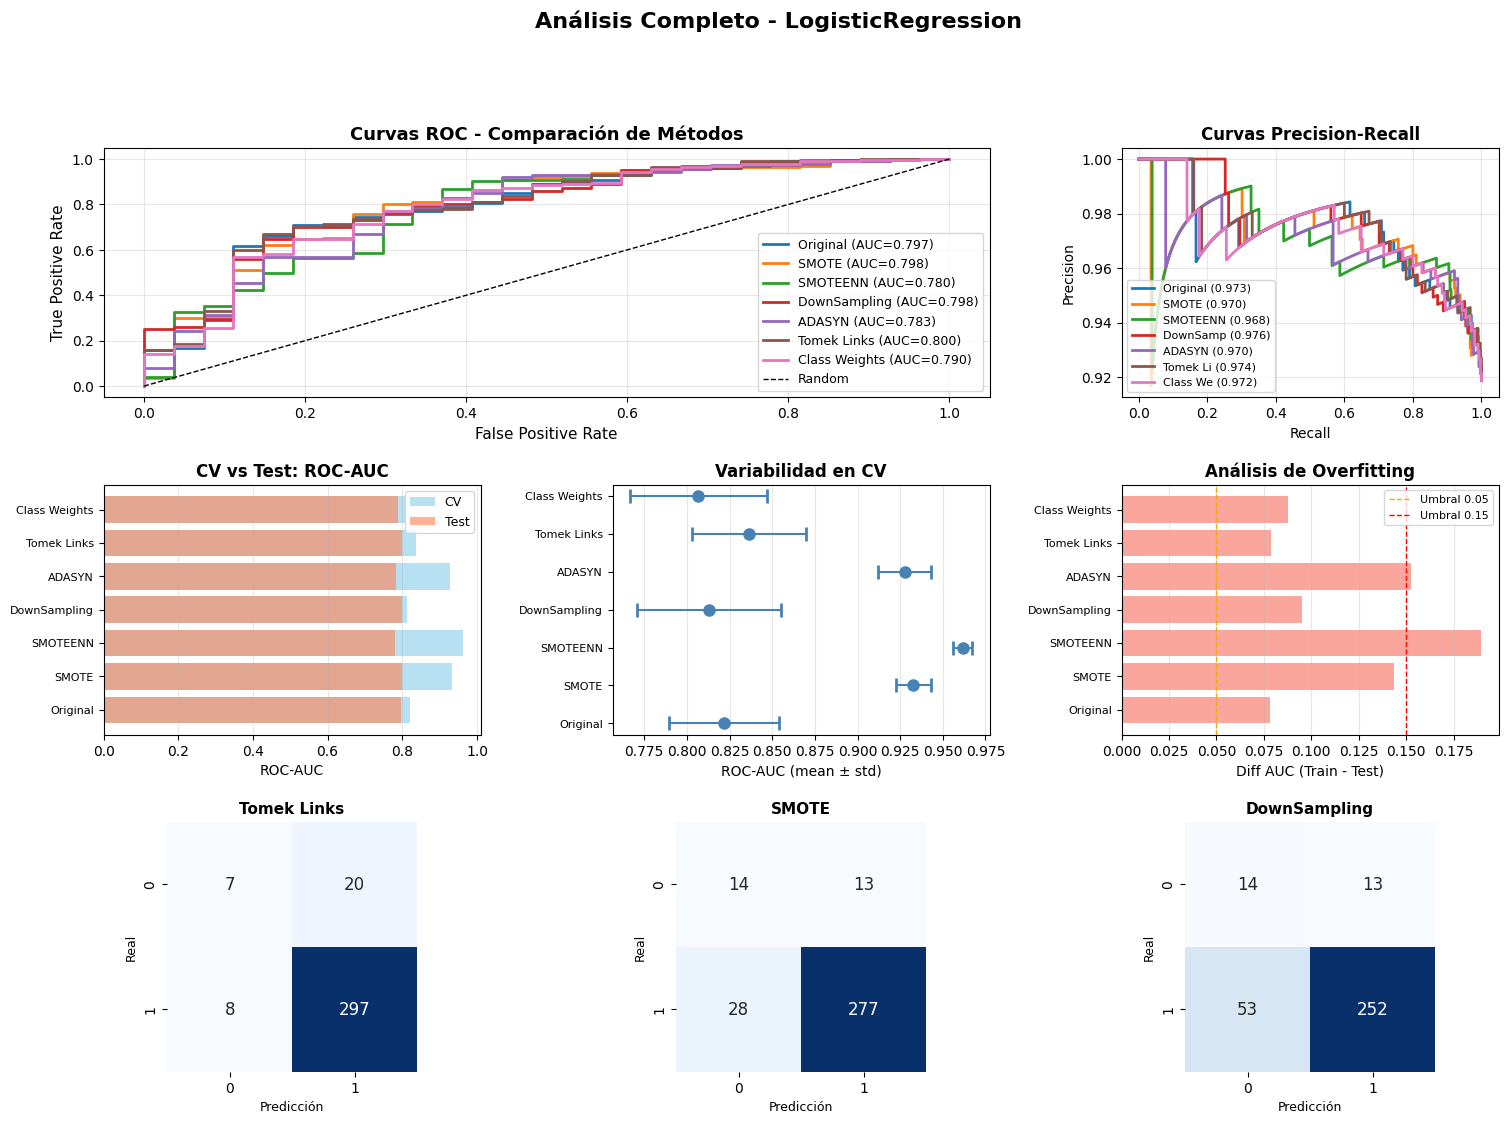

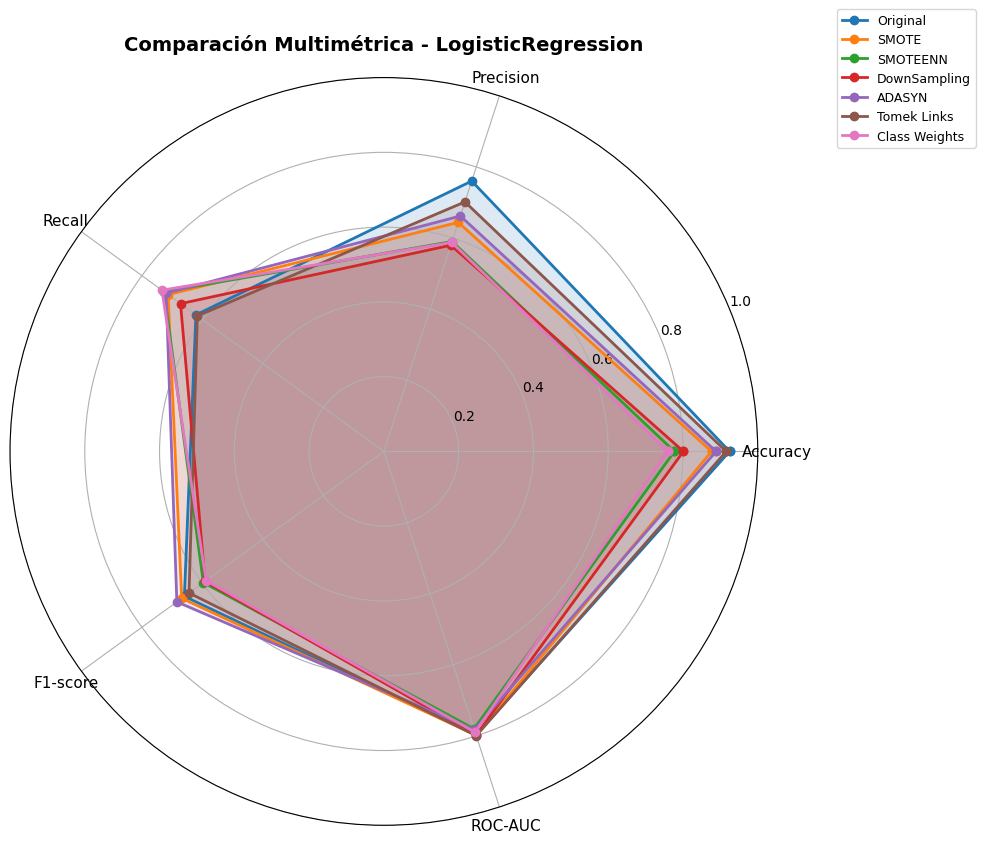

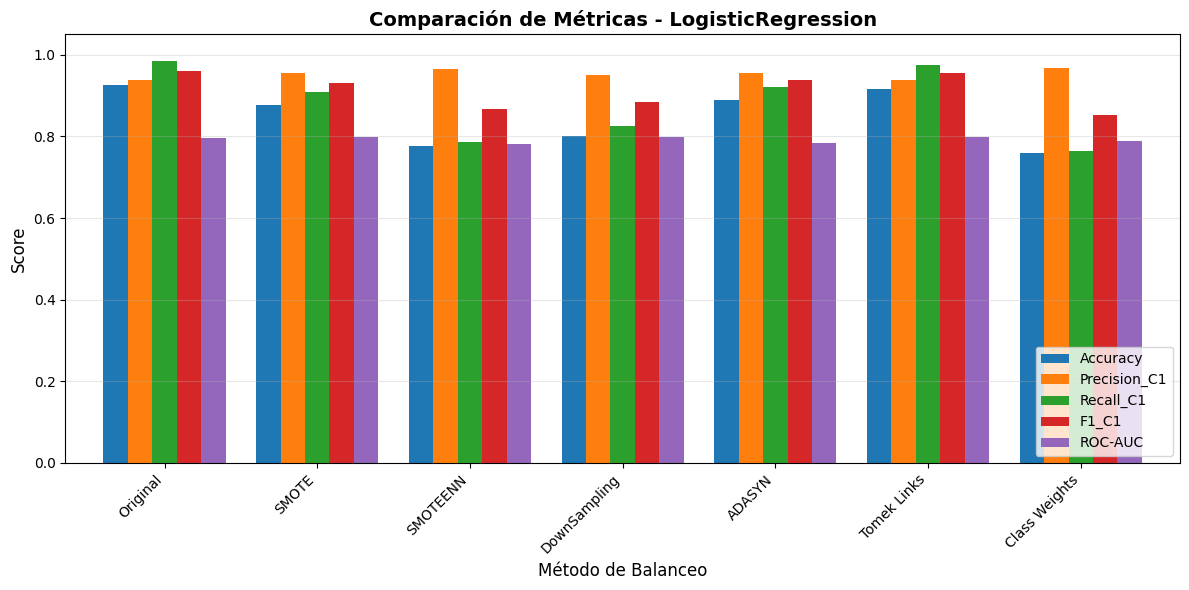


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.848967  0.068364  0.759036  0.789157  0.876506  0.902108   
Precision    7.0  0.646667  0.067464  0.579949  0.589080  0.644253  0.681945   
Recall       7.0  0.686313  0.050050  0.616515  0.646903  0.713358  0.723345   
F1-score     7.0  0.633177  0.040515  0.587757  0.593945  0.644159  0.663966   
ROC-AUC      7.0  0.792211  0.008030  0.780206  0.786217  0.797086  0.798118   

                max  
Accuracy   0.924699  
Precision  0.760417  
Recall     0.733819  
F1-score   0.684500  
ROC-AUC    0.799514  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.865984  0.060419  0.781464  0.825386  0.880213   
CV Precision    7.0  0.908454  0.045224  0.824904  0.895338  0.907071   
CV Recall       7.0  0.900299  0.070623  0.787546  0.862172  0.907310   
CV F1           7.0  0.9023

In [41]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "LogisticRegression"

# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### Arboles de Decision

 ANÁLISIS COMPARATIVO - DECISIONTREE

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9066 (+/- 0.0148)
PRECISION   : 0.9377 (+/- 0.0068)
RECALL      : 0.9623 (+/- 0.0154)
F1          : 0.9498 (+/- 0.0082)
ROC_AUC     : 0.6016 (+/- 0.0578)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       108
           1       0.97      0.98      0.98      1219

    accuracy                           0.95      1327
   macro avg       0.87      0.80      0.83      1327
weighted avg       0.95      0.95      0.95      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.38      0.33      0.35        27
           1       0.94      0.95      0.95       305

    accuracy                           0.90       332
   macro avg       0.66      0.64      0.65       332
weighted avg       0.90      0.90      0.90       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATION -

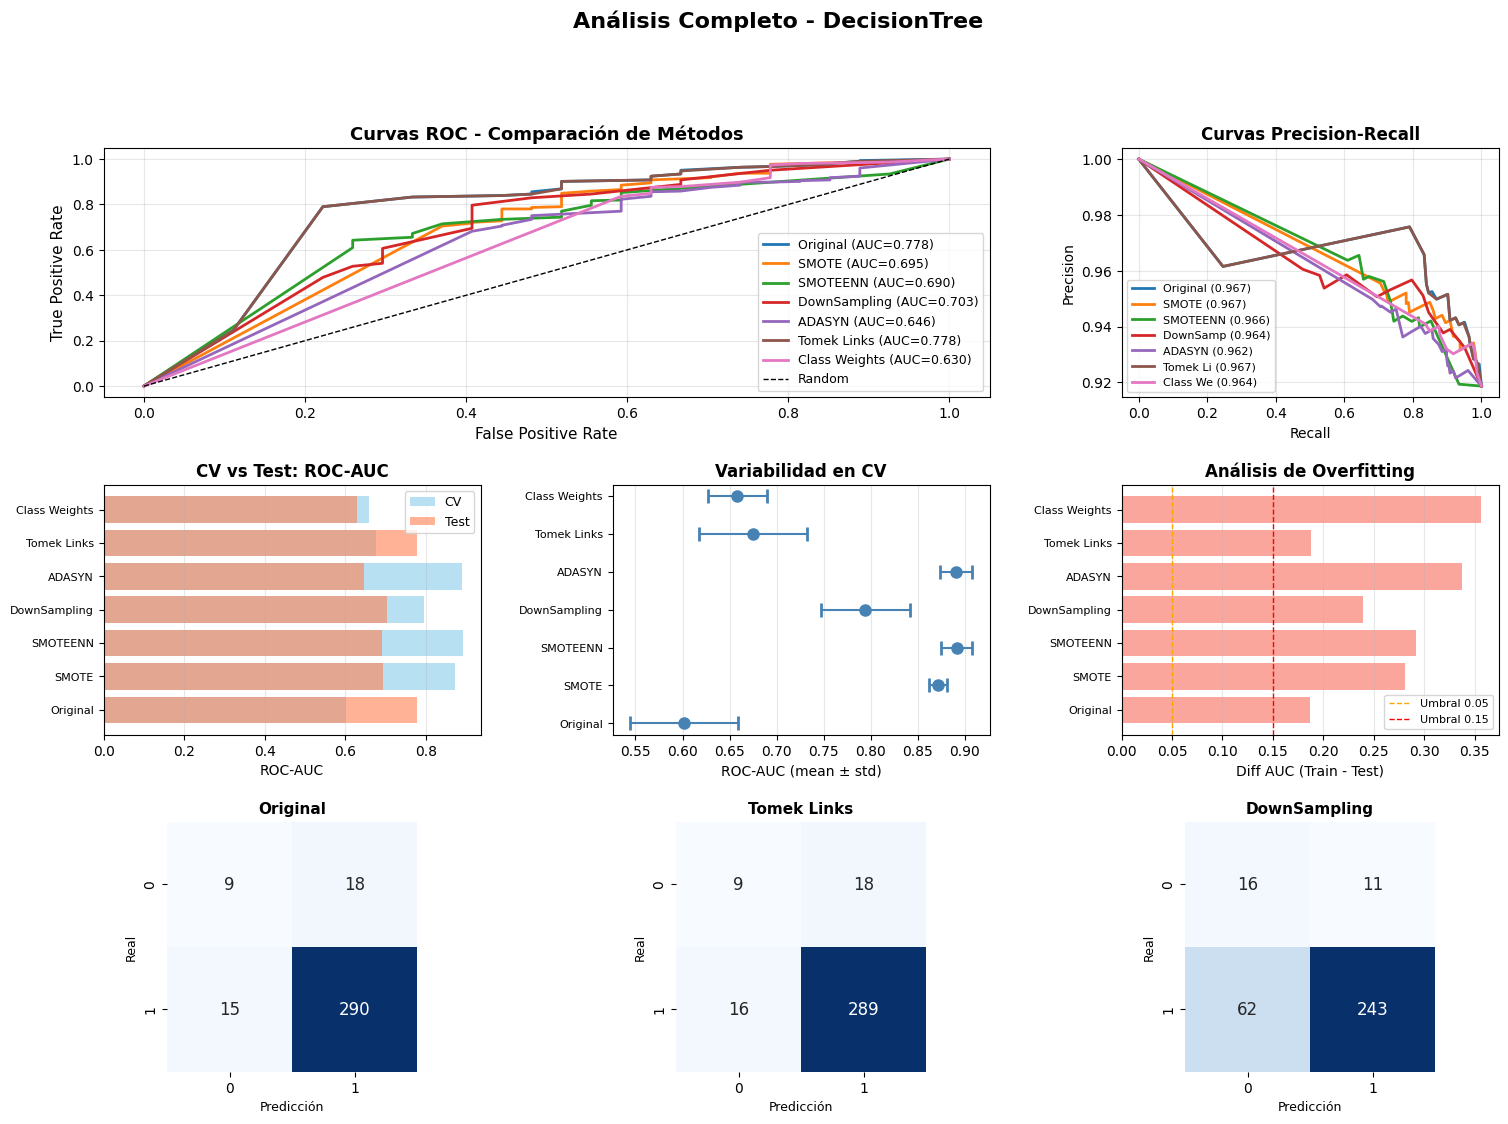

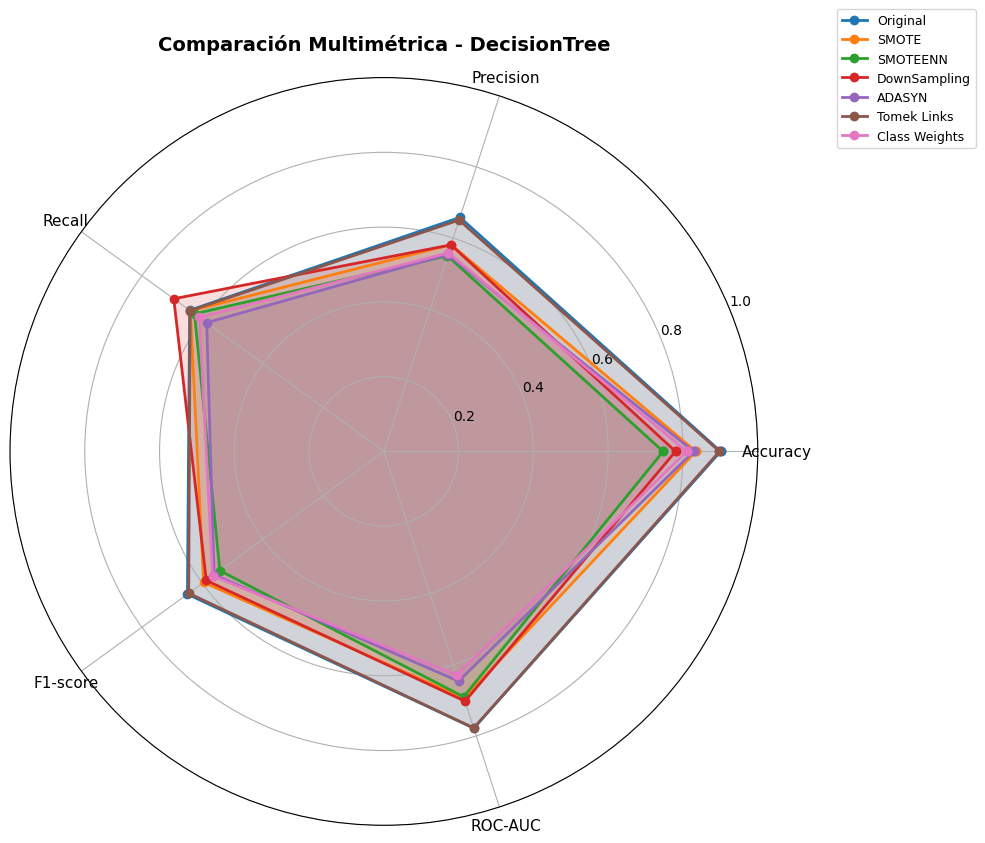

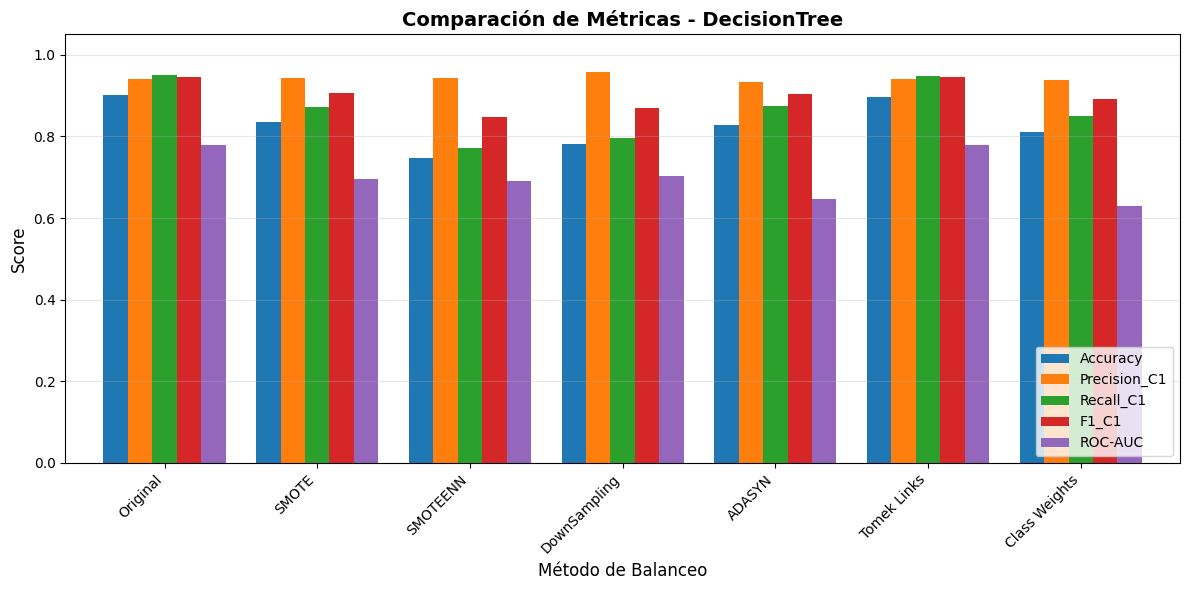


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.828313  0.056751  0.746988  0.795181  0.828313  0.865964   
Precision    7.0  0.590562  0.045436  0.550201  0.556114  0.580911  0.616158   
Recall       7.0  0.634079  0.033636  0.585853  0.617881  0.639769  0.641257   
F1-score     7.0  0.592564  0.041342  0.542370  0.563815  0.587086  0.620654   
ROC-AUC      7.0  0.702793  0.057838  0.629933  0.668154  0.694536  0.740225   

                max  
Accuracy   0.900602  
Precision  0.658279  
Recall     0.694657  
F1-score   0.649554  
ROC-AUC    0.778324  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.845164  0.046511  0.771683  0.824788  0.839960   
CV Precision    7.0  0.890237  0.051064  0.826332  0.850723  0.884474   
CV Recall       7.0  0.874784  0.065511  0.777690  0.845186  0.862180   
CV F1           7.0  0.8811

In [42]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "DecisionTree"


# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### Random Forest

 ANÁLISIS COMPARATIVO - RANDOMFOREST

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9216 (+/- 0.0055)
PRECISION   : 0.9220 (+/- 0.0043)
RECALL      : 0.9992 (+/- 0.0016)
F1          : 0.9591 (+/- 0.0029)
ROC_AUC     : 0.8081 (+/- 0.0289)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       1.00      0.36      0.53       108
           1       0.95      1.00      0.97      1219

    accuracy                           0.95      1327
   macro avg       0.97      0.68      0.75      1327
weighted avg       0.95      0.95      0.94      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.96      0.54      0.55       332
weighted avg       0.93      0.92      0.89       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATION -

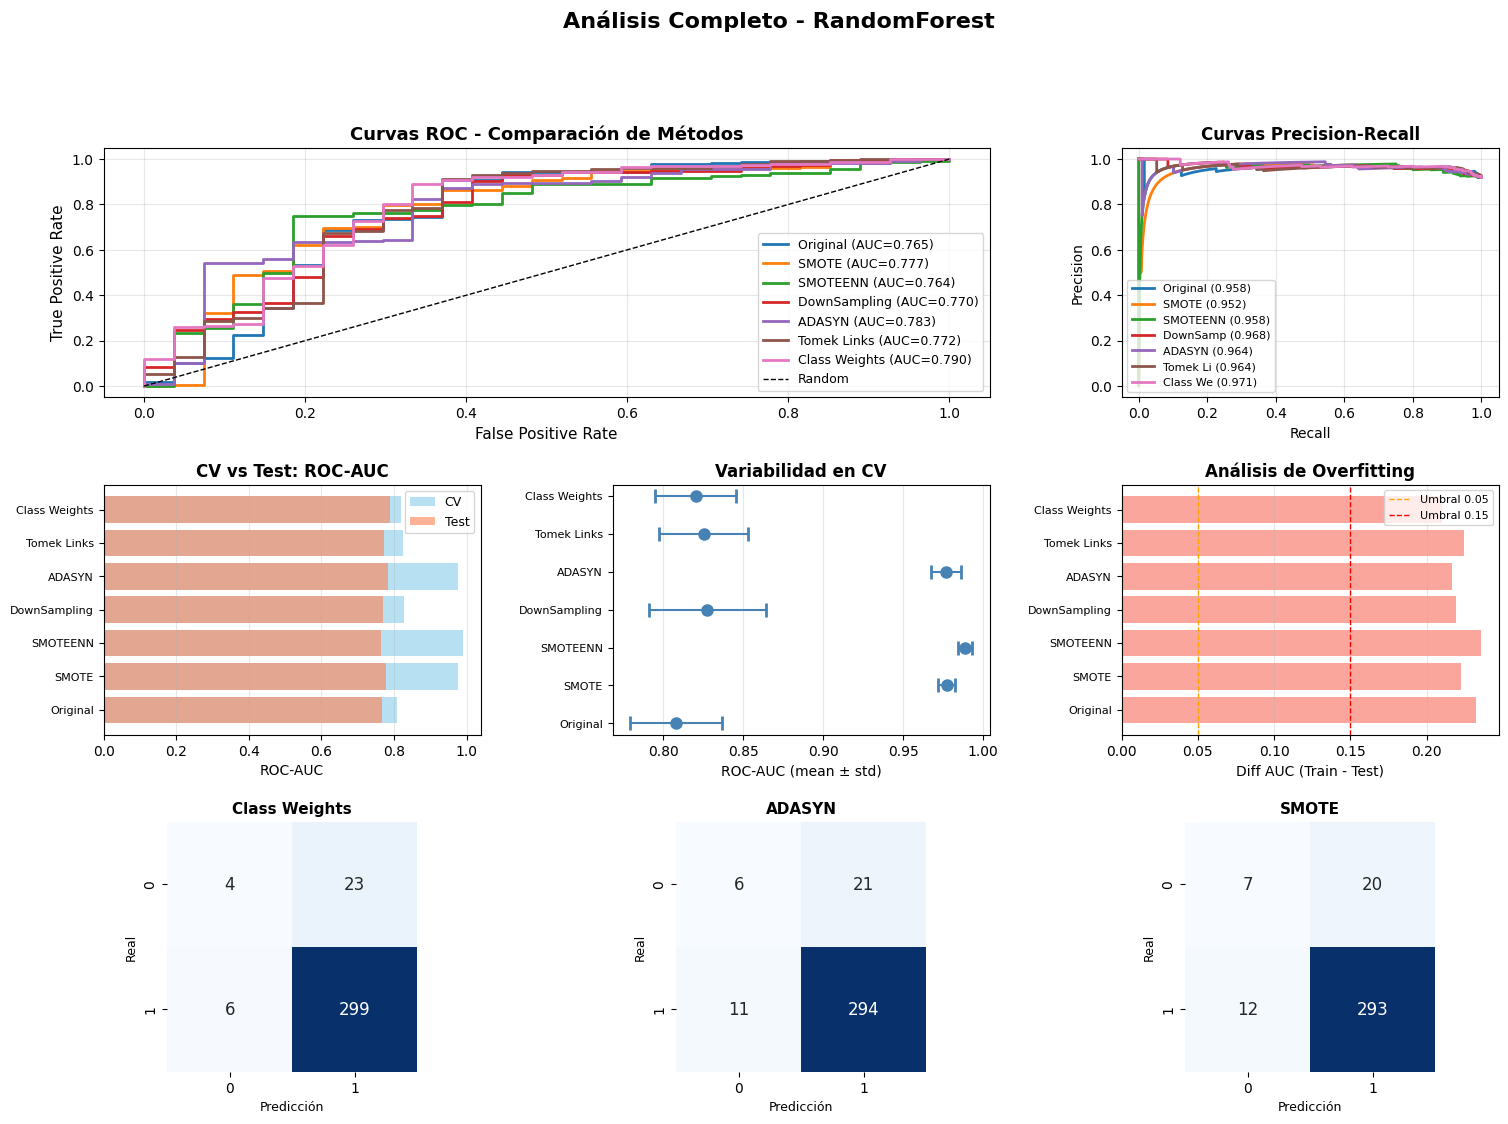

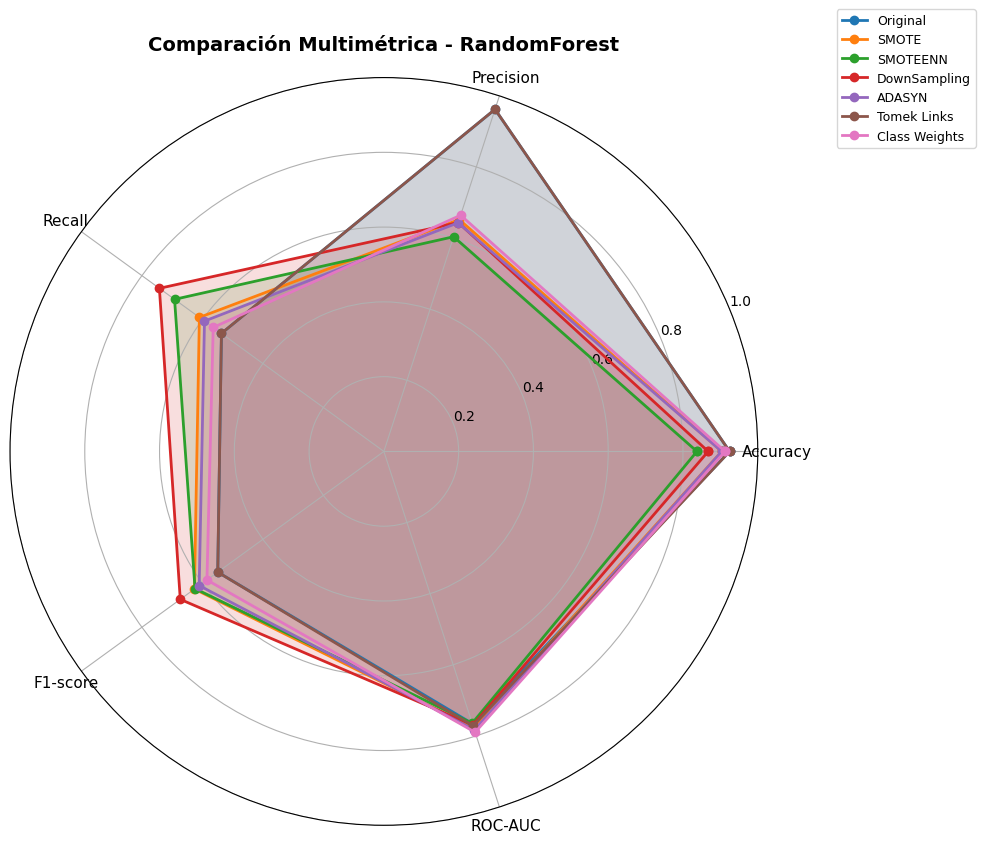

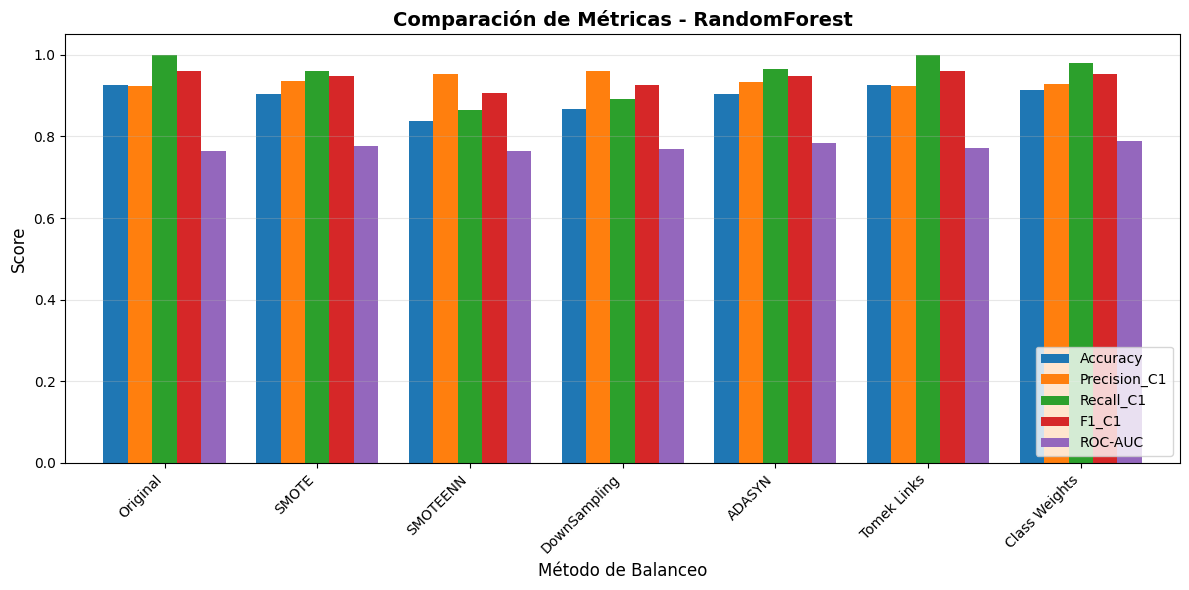


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.896299  0.032387  0.837349  0.885542  0.903614  0.918675   
Precision    7.0  0.733081  0.157560  0.603807  0.643484  0.652262  0.813203   
Recall       7.0  0.610799  0.078773  0.537037  0.550638  0.593078  0.651002   
F1-score     7.0  0.602548  0.044842  0.549280  0.567131  0.610557  0.625312   
ROC-AUC      7.0  0.774499  0.009407  0.764420  0.767577  0.771706  0.780206   

                max  
Accuracy   0.924699  
Precision  0.962121  
Recall     0.742198  
F1-score   0.673111  
ROC-AUC    0.789800  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.908528  0.045513  0.808702  0.915876  0.919970   
CV Precision    7.0  0.903786  0.045243  0.806261  0.903660  0.916479   
CV Recall       7.0  0.974965  0.028731  0.929097  0.960544  0.982770   
CV F1           7.0  0.9374

In [43]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "RandomForest"

# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### KNN

 ANÁLISIS COMPARATIVO - KNN

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9073 (+/- 0.0019)
PRECISION   : 0.9183 (+/- 0.0017)
RECALL      : 0.9869 (+/- 0.0016)
F1          : 0.9514 (+/- 0.0010)
ROC_AUC     : 0.5309 (+/- 0.0323)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      0.99      0.95       305

    accuracy                           0.91       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84      0.91      0.88       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATION ---
ACCURA

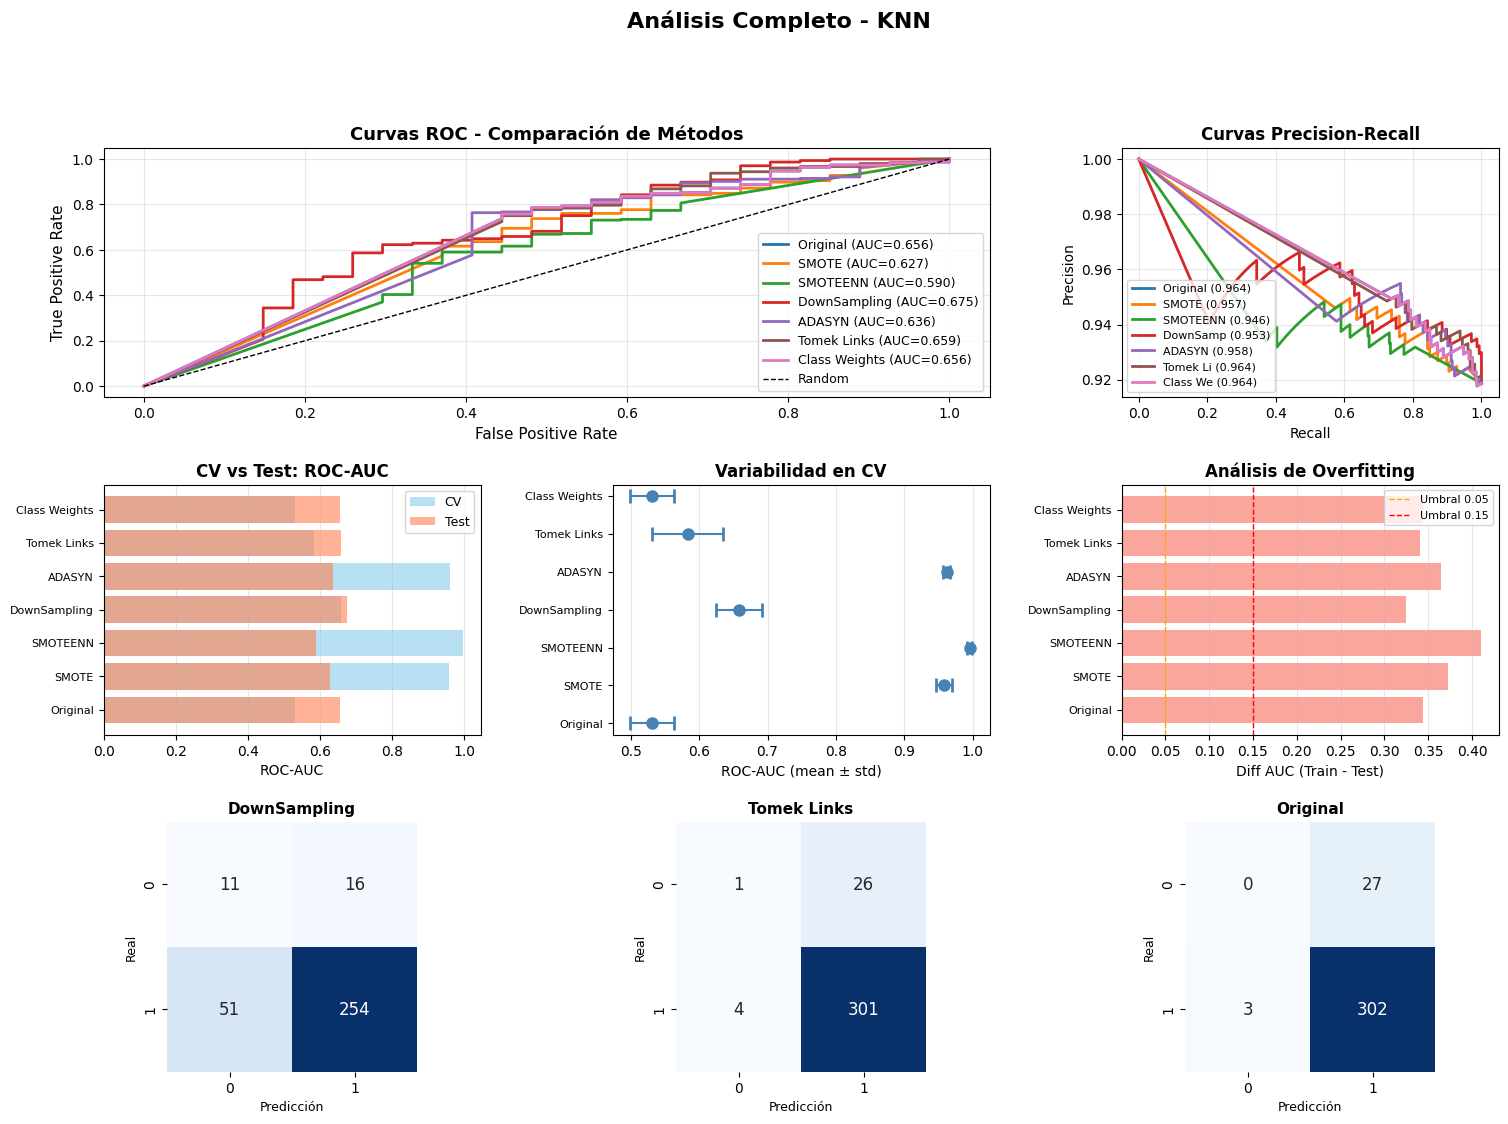

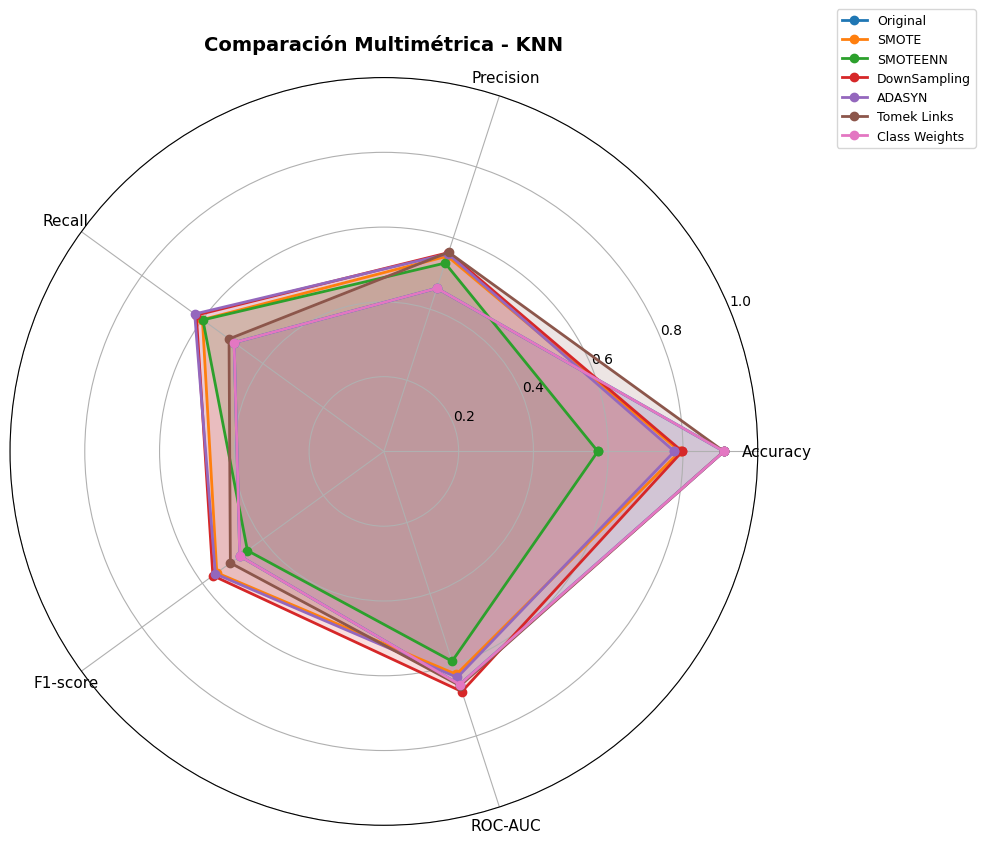

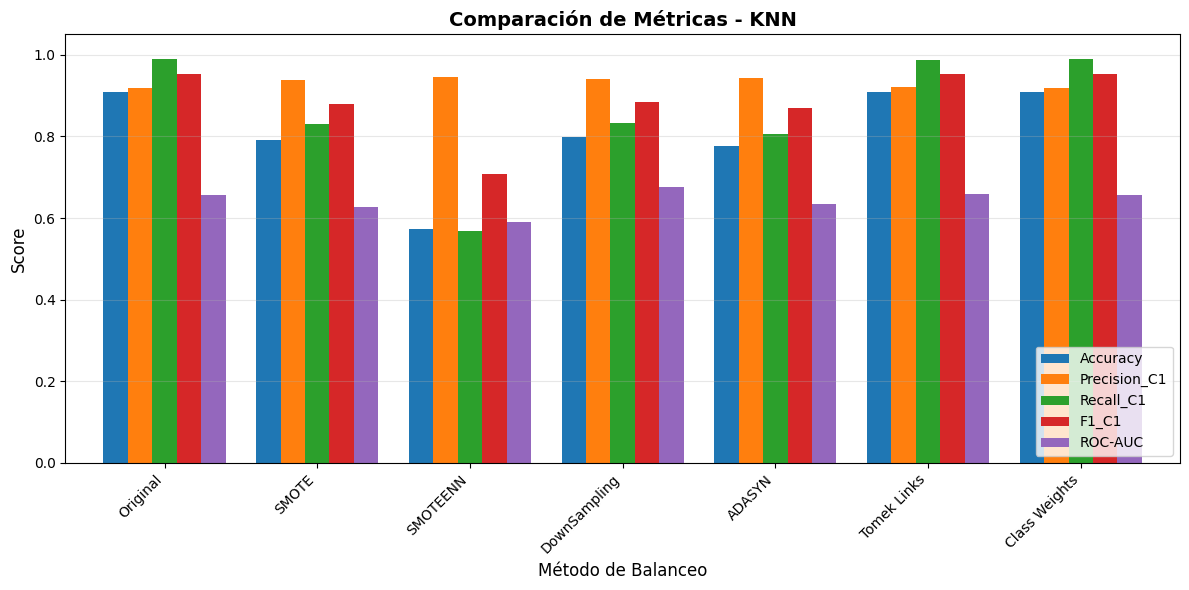


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.809811  0.120988  0.572289  0.784639  0.798193  0.909639   
Precision    7.0  0.524560  0.045964  0.458967  0.494346  0.549164  0.557426   
Recall       7.0  0.563726  0.060018  0.495082  0.503522  0.598421  0.610018   
F1-score     7.0  0.512295  0.046147  0.451099  0.476341  0.507516  0.554719   
ROC-AUC      7.0  0.642606  0.028071  0.590103  0.631299  0.655616  0.657256   

                max  
Accuracy   0.909639  
Precision  0.560245  
Recall     0.625501  
F1-score   0.565335  
ROC-AUC    0.675410  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.859354  0.101978  0.651442  0.836797  0.907309   
CV Precision    7.0  0.921269  0.098615  0.714416  0.918323  0.918860   
CV Recall       7.0  0.885071  0.107847  0.758821  0.783186  0.903368   
CV F1           7.0  0.8976

In [44]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "KNN"


# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### SVM

 ANÁLISIS COMPARATIVO - SVM

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9186 (+/- 0.0018)
PRECISION   : 0.9186 (+/- 0.0018)
RECALL      : 1.0000 (+/- 0.0000)
F1          : 0.9576 (+/- 0.0010)
ROC_AUC     : 0.7735 (+/- 0.0528)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.92      1.00      0.96      1219

    accuracy                           0.92      1327
   macro avg       0.46      0.50      0.48      1327
weighted avg       0.84      0.92      0.88      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84      0.92      0.88       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATION ---
ACCURA

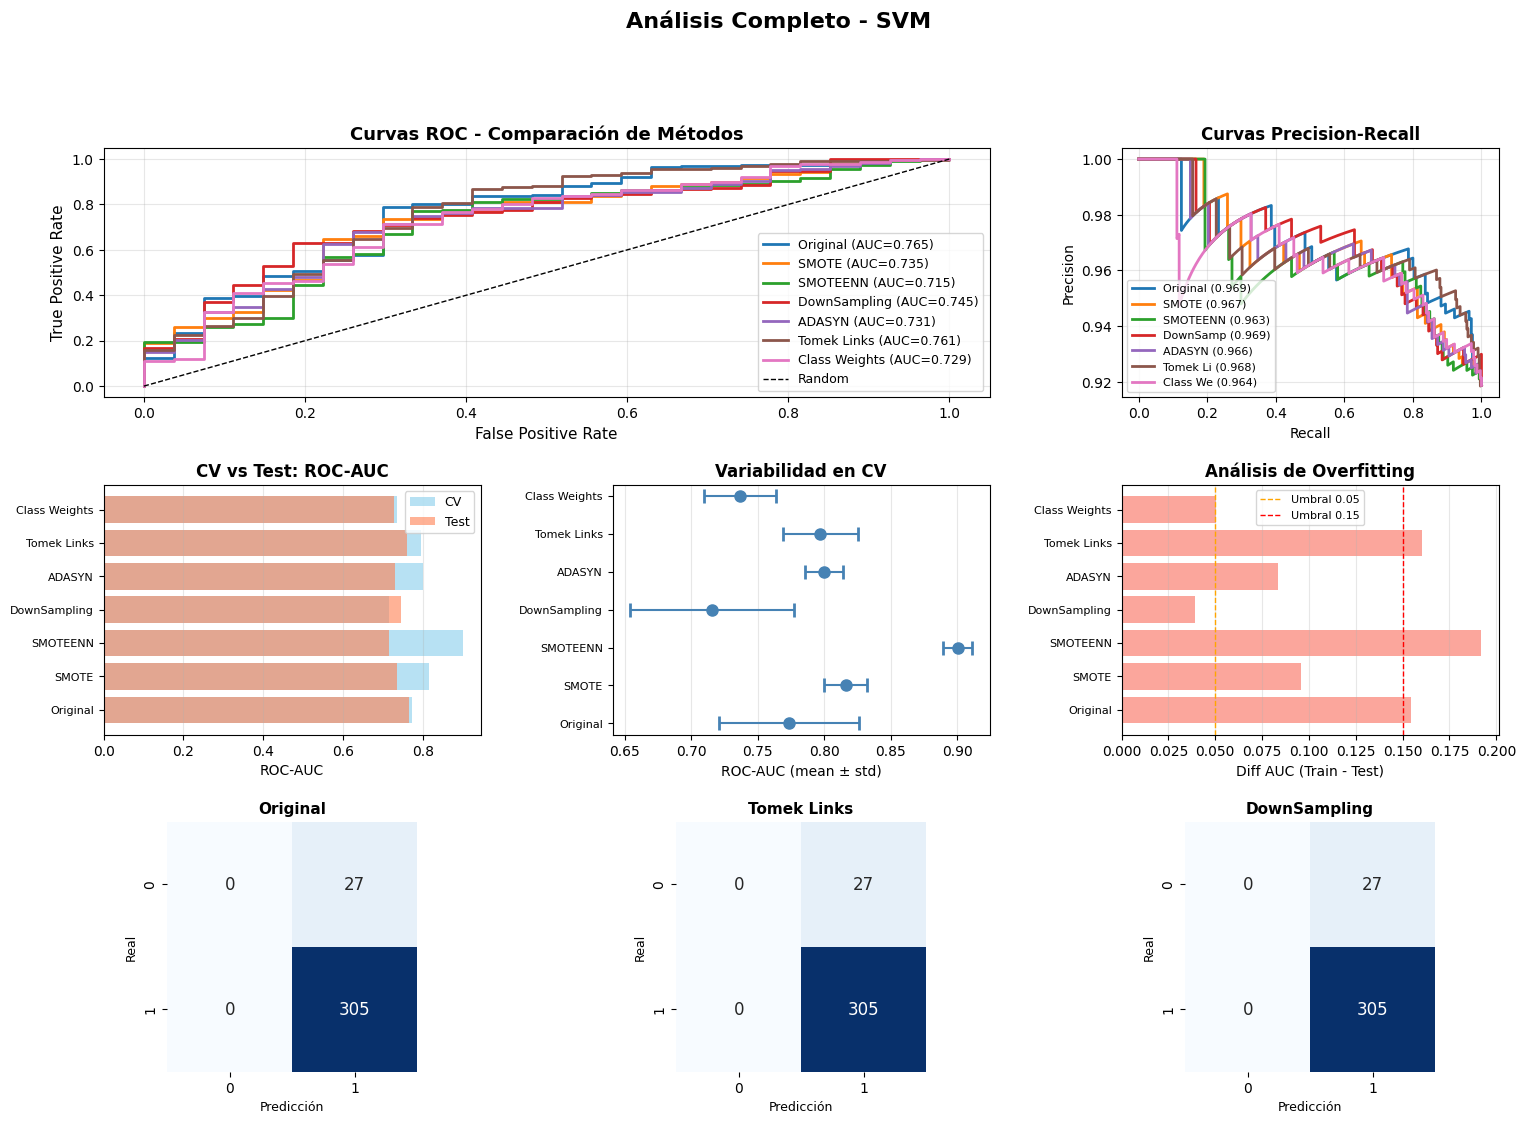

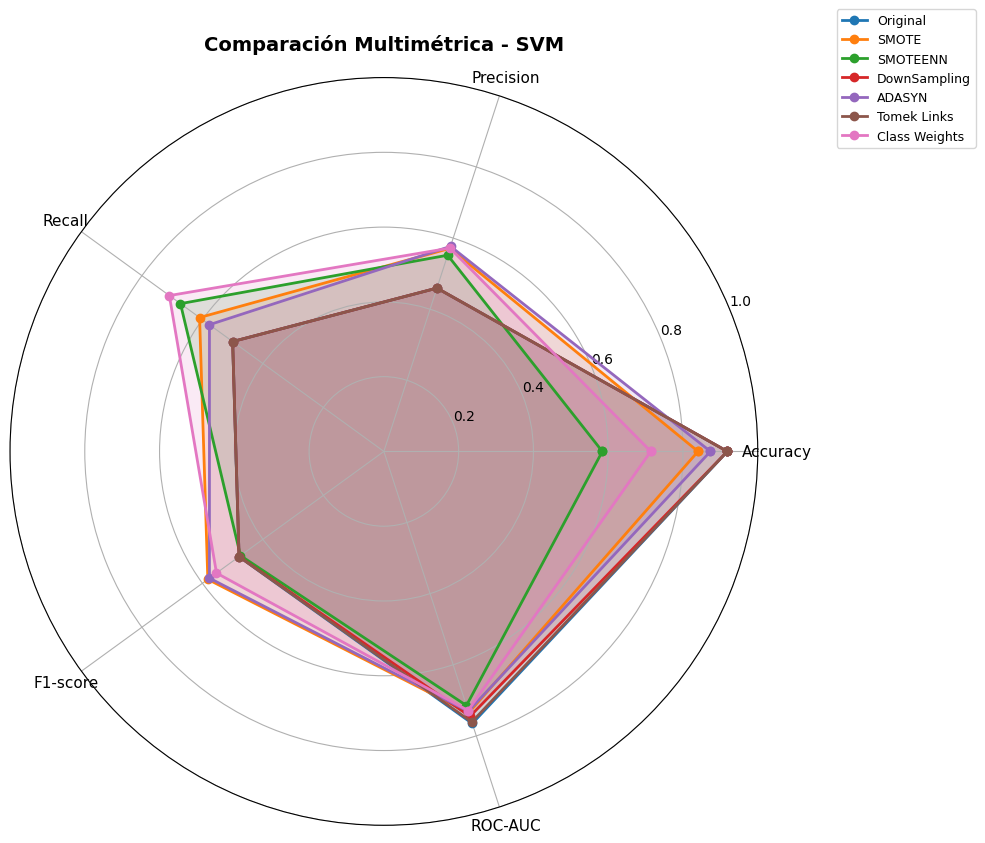

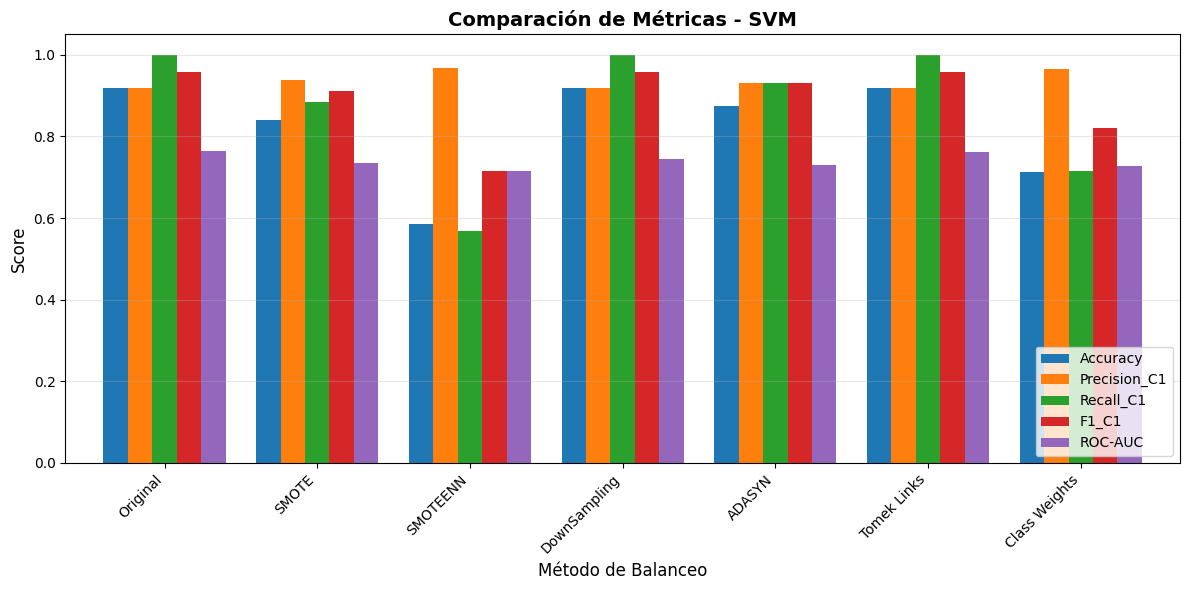


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.824010  0.128567  0.584337  0.777108  0.873494  0.918675   
Precision    7.0  0.521359  0.058531  0.459337  0.459337  0.551868  0.571473   
Recall       7.0  0.581100  0.086906  0.500000  0.500000  0.576685  0.640893   
F1-score     7.0  0.517527  0.050557  0.474105  0.478807  0.478807  0.565044   
ROC-AUC      7.0  0.740047  0.018189  0.714633  0.729751  0.734791  0.753127   

                max  
Accuracy   0.918675  
Precision  0.576685  
Recall     0.709229  
F1-score   0.582073  
ROC-AUC    0.765149  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.784891  0.110140  0.666683  0.696968  0.743982   
CV Precision    7.0  0.831410  0.110453  0.666683  0.748097  0.866075   
CV Recall       7.0  0.891464  0.134837  0.668566  0.816193  0.939297   
CV F1           7.0  0.8492

In [45]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "SVM"


# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### Gradient Boost

 ANÁLISIS COMPARATIVO - GRADIENTBOOSTING

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9284 (+/- 0.0053)
PRECISION   : 0.9357 (+/- 0.0026)
RECALL      : 0.9902 (+/- 0.0072)
F1          : 0.9621 (+/- 0.0030)
ROC_AUC     : 0.8069 (+/- 0.0259)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.57      0.30      0.39        27
           1       0.94      0.98      0.96       305

    accuracy                           0.92       332
   macro avg       0.76      0.64      0.68       332
weighted avg       0.91      0.92      0.91       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATI

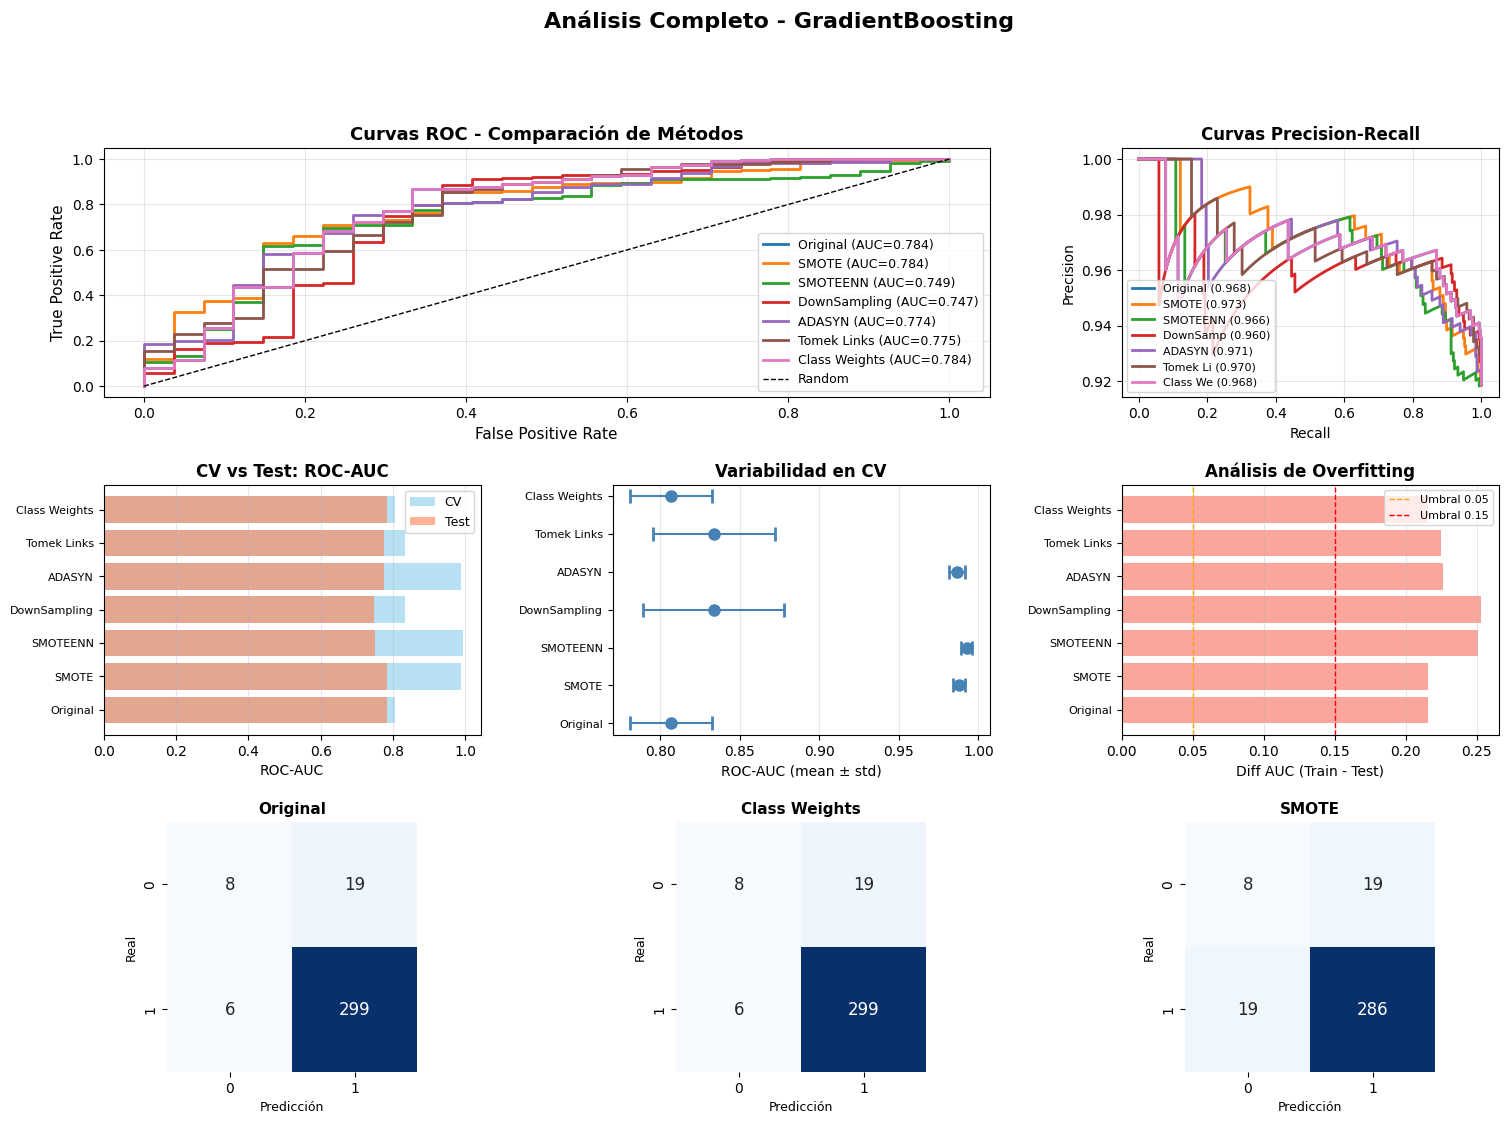

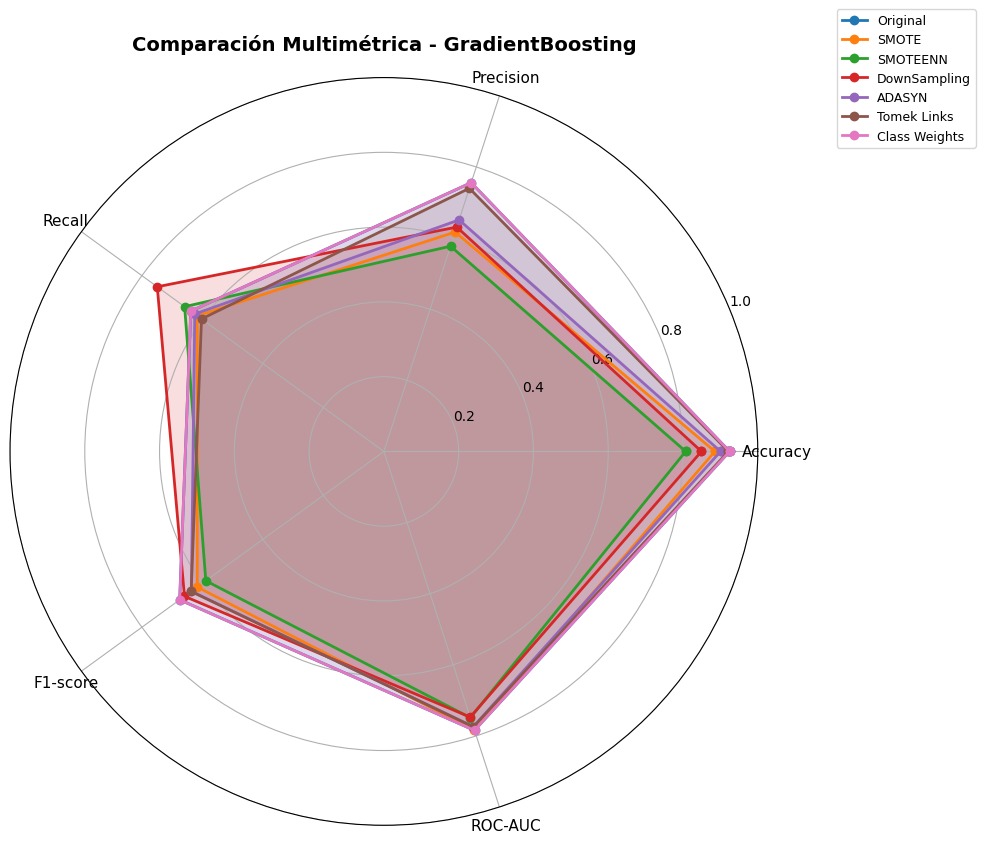

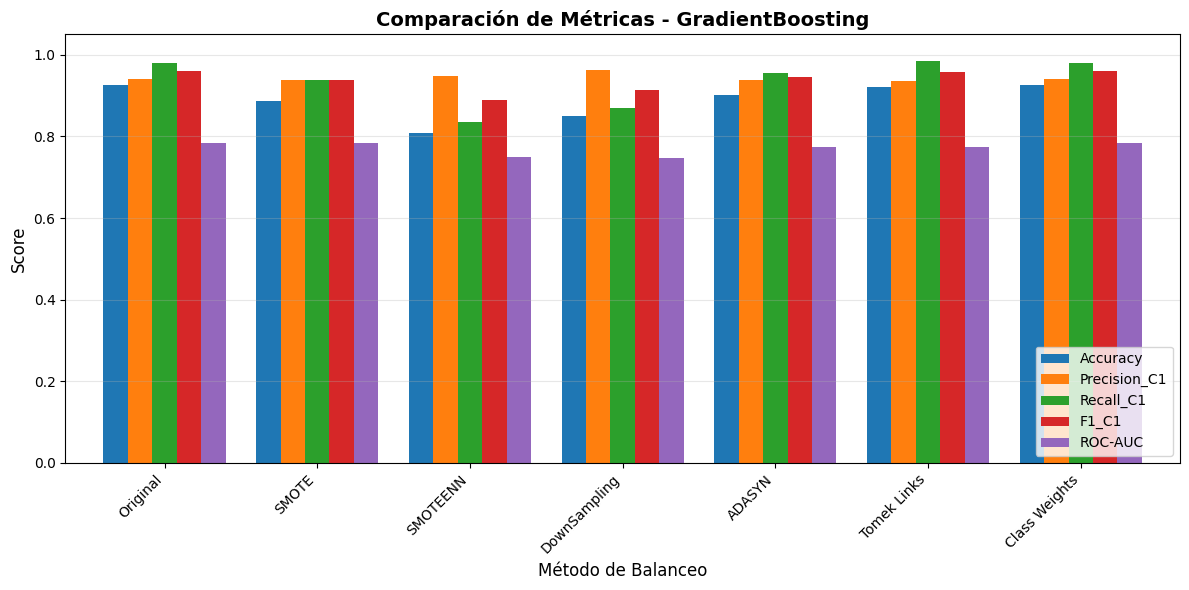


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.887694  0.044734  0.807229  0.867470  0.900602  0.923193   
Precision    7.0  0.675423  0.073873  0.577152  0.623971  0.651173  0.747929   
Recall       7.0  0.647107  0.048411  0.602914  0.621099  0.638312  0.648543   
F1-score     7.0  0.641236  0.031626  0.588695  0.626718  0.637128  0.667168   
ROC-AUC      7.0  0.771186  0.016406  0.747298  0.761445  0.774863  0.784396   

                max  
Accuracy   0.924699  
Precision  0.755840  
Recall     0.749241  
F1-score   0.675058  
ROC-AUC    0.784457  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.923776  0.047173  0.820769  0.928334  0.928415   
CV Precision    7.0  0.932792  0.046680  0.832226  0.935291  0.935677   
CV Recall       7.0  0.962413  0.036384  0.904916  0.942412  0.976213   
CV F1           7.0  0.9466

In [46]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "GradientBoosting"

# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### XPG Boost

 ANÁLISIS COMPARATIVO - XGBOOST

 ENTRENANDO: Original

--- CROSS-VALIDATION ---
ACCURACY    : 0.9352 (+/- 0.0099)
PRECISION   : 0.9374 (+/- 0.0046)
RECALL      : 0.9959 (+/- 0.0063)
F1          : 0.9658 (+/- 0.0053)
ROC_AUC     : 0.8315 (+/- 0.0370)

--- MÉTRICAS TRAIN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327


--- MÉTRICAS TEST ---
              precision    recall  f1-score   support

           0       0.67      0.22      0.33        27
           1       0.93      0.99      0.96       305

    accuracy                           0.93       332
   macro avg       0.80      0.61      0.65       332
weighted avg       0.91      0.93      0.91       332


 ENTRENANDO: SMOTE

--- CROSS-VALIDATION ---
AC

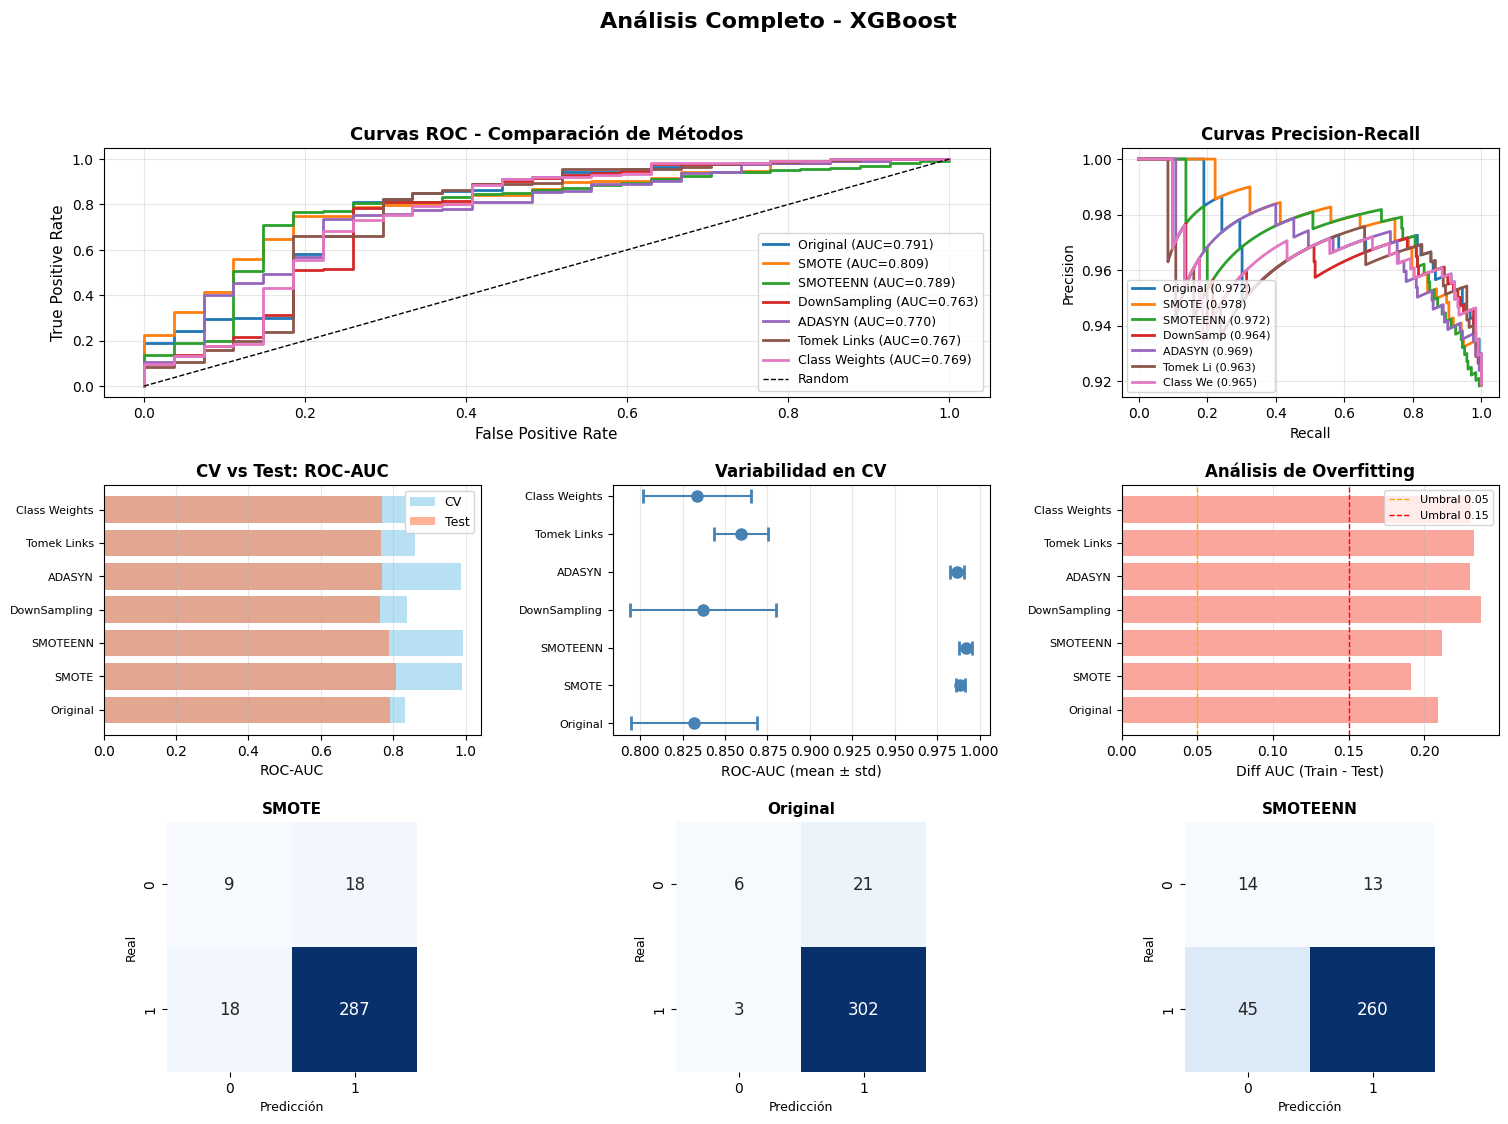

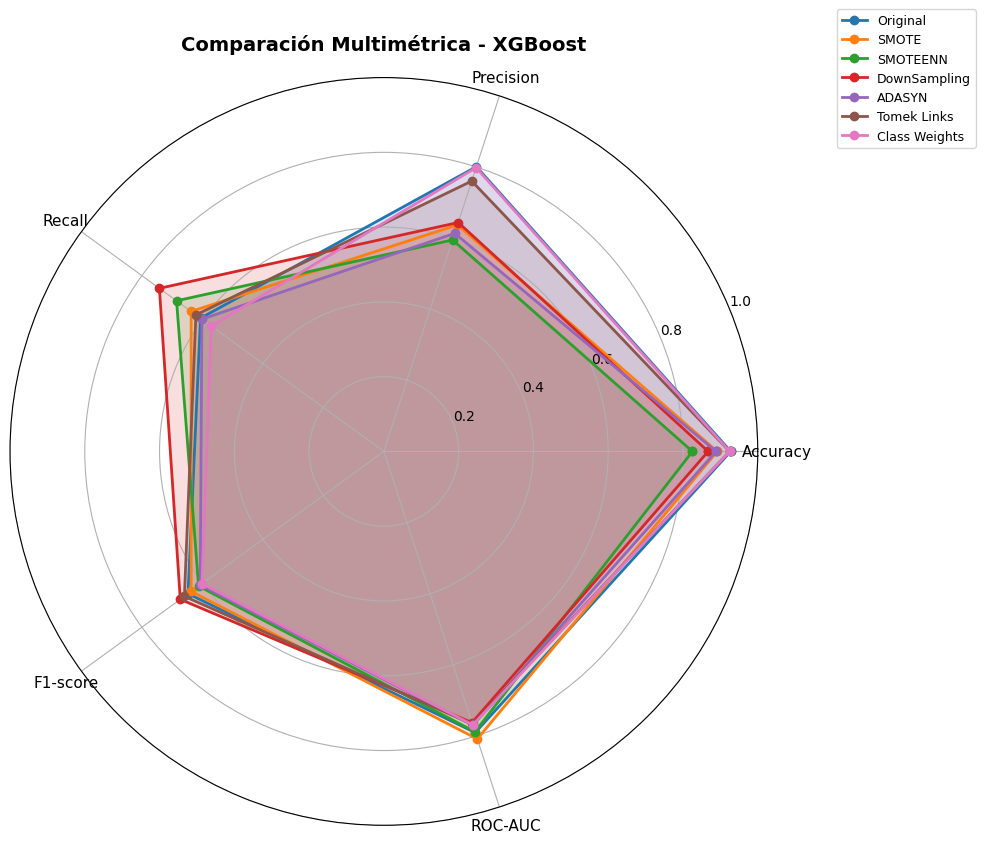

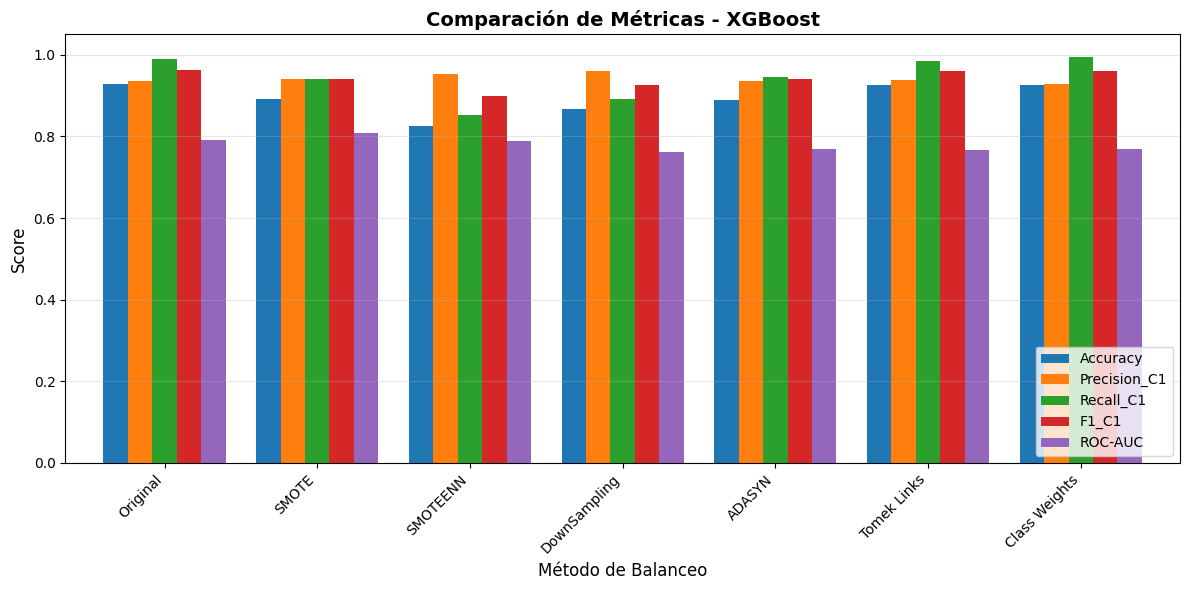


 ESTADÍSTICAS DESCRIPTIVAS

--- TEST ---
           count      mean       std       min       25%       50%       75%  \
Accuracy     7.0  0.892857  0.037575  0.825301  0.878012  0.891566  0.924699   
Precision    7.0  0.692641  0.090112  0.594835  0.625262  0.643831  0.779237   
Recall       7.0  0.637861  0.058064  0.570795  0.603977  0.621433  0.661324   
F1-score     7.0  0.634059  0.027742  0.601402  0.609847  0.637158  0.653523   
ROC-AUC      7.0  0.779617  0.016742  0.762720  0.768306  0.770006  0.789678   

                max  
Accuracy   0.927711  
Precision  0.800826  
Recall     0.742198  
F1-score   0.673111  
ROC-AUC    0.808622  

--- CROSS-VALIDATION ---
              count      mean       std       min       25%       50%  \
CV Accuracy     7.0  0.925314  0.047354  0.820769  0.930657  0.935202   
CV Precision    7.0  0.933805  0.046248  0.835863  0.932796  0.937445   
CV Recall       7.0  0.963481  0.038240  0.909742  0.939157  0.968013   
CV F1           7.0  0.9477

In [47]:
# ============================================================================
# CELDA 6: SCRIPT PRINCIPAL (USO SIMPLIFICADO)
# ============================================================================

# ===== CONFIGURACIÓN =====
MODELO_TIPO = "XGBoost"


# ===== DATASETS =====
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smenn, y_train_smenn),
    "DownSampling": (X_train_down, y_train_down),
    "ADASYN": (X_train_ada, y_train_ada),
    "Tomek Links": (X_train_tomek, y_train_tomek),
    "Class Weights": (X_train, y_train)
}

# ===== PIPELINE COMPLETO =====
trainer = ModelTrainer(MODELO_TIPO, datasets, X_test, y_test, n_folds=5)
trainer.entrenar_todo(verbose=True)
trainer.mostrar_resultados()

# ===== VISUALIZACIONES Y ANÁLISIS COMPLETO =====
visualizer = ModelVisualizer(trainer)
visualizer.generar_reporte_completo()


### Comparacion

In [48]:
# ============================================================================
# BONUS: COMPARAR MÚLTIPLES MODELOS
# ============================================================================
def comparar_modelos(modelos_lista, datasets, X_test, y_test):
    """Compara múltiples modelos automáticamente"""
    resultados_globales = []

    for modelo_tipo in modelos_lista:
        print(f"\n{'#'*70}")
        print(f"# EVALUANDO: {modelo_tipo}")
        print(f"{'#'*70}")

        trainer = ModelTrainer(modelo_tipo, datasets, X_test, y_test)
        trainer.entrenar_todo(verbose=False)

        # Obtener mejor método por ROC-AUC
        mejor = trainer.df_test.loc[trainer.df_test['ROC-AUC'].idxmax()]

        resultados_globales.append({
            'Modelo': modelo_tipo,
            'Mejor_Método': mejor['Método'],
            'Test_ROC-AUC': mejor['ROC-AUC'],
            'Test_Recall_C1': mejor['Recall_C1'],
            'Test_Precision_C1': mejor['Precision_C1'],
            'Test_F1_C1': mejor['F1_C1']
        })

    df_comparacion = pd.DataFrame(resultados_globales)
    print("\n" + "="*70)
    print(" RANKING DE MODELOS")
    print("="*70)
    print(df_comparacion.sort_values(by='Test_ROC-AUC', ascending=False).to_string(index=False))

    return df_comparacion

# Uso:
modelos = ["LogisticRegression", "DecisionTree", "RandomForest", "KNN", "SVM", "GradientBoosting", "XGBoost"]
df_ranking = comparar_modelos(modelos, datasets, X_test, y_test)


######################################################################
# EVALUANDO: LogisticRegression
######################################################################
 ANÁLISIS COMPARATIVO - LOGISTICREGRESSION

######################################################################
# EVALUANDO: DecisionTree
######################################################################
 ANÁLISIS COMPARATIVO - DECISIONTREE

######################################################################
# EVALUANDO: RandomForest
######################################################################
 ANÁLISIS COMPARATIVO - RANDOMFOREST

######################################################################
# EVALUANDO: KNN
######################################################################
 ANÁLISIS COMPARATIVO - KNN

######################################################################
# EVALUANDO: SVM
######################################################################
 ANÁLISIS COMPARATIVO 